<a href="https://colab.research.google.com/github/ThiRCosta/MVP-Sprint_3/blob/main/SP3_MVP_ThiagoRCosta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Sprint 3 - PUC Rio - 2023

## Aluno: Thiago Rodrigues da Costa

# 1. OBJETIVO

O Ministério da Saúde (MS), por meio da Secretaria de Vigilância em Saúde (SVS), desenvolve a vigilância da Síndrome Respiratória Aguda Grave (SRAG) no Brasil, desde a pandemia de Influenza A(H1N1). A partir disso, a vigilância de SRAG foi implantada na rede de vigilância de Influenza e outros vírus respiratórios, que anteriormente atuava exclusivamente com a vigilância sentinela de Síndrome Gripal (SG).

De 2009 até 2018, o sistema oficial para o registo dos casos e óbitos por SRAG era o Sistema de Informação de Agravos de Notificação – Sinan Web Influenza. A partir de 2019, o sistema oficial passou a ser o Sistema de Informação da Vigilância Epidemiológica da Gripe (SIVEP-Gripe).

Nosso objetivo é avaliar os casos de SRAG entre 2019 e 2023 e avaliar o comportamento das SRAG em diferentes épocas do ano e em cada estado brasileiro.

Importante ressaltar também que no final de 2019 se iniciou uma pandemia de covid-19.

Espera-se que seja possível responder as seguintes perguntas:

1- Quantidade de casos de SRAG por ano no Brasil.

2- Quantidade de casos de SRAG por estado e por ano.

3- Quais os meses em que temos mais casos de SRAG por ano.

4- Quantidade de casos por mês e ano de acordo com a sua classificação.

5- Quantidade de casos por mês e ano que evolui para óbito

6- Quantidade de casos por mês e ano em que o paciente está com a vacina contra gripe em dia.

# 2. DETALHAMENTO

## 2.1. Busca pelos dados

As informações dos datasets que serão utilizados neste projeto serão extraídos do DataSUS (https://opendatasus.saude.gov.br). Esclarece-se que as informações extraídas e disponiblizadas nestes datasets passaram por tratamento que envolve a anonimização, em cumprimento a Lei 13.709/2018.

Os datasets utilizados nesse MVP são referentes aos anos de 2019 à 2023 (parte) e podem ser baixados nos respectivos links abaixo:

*   SRAG 2019 - https://opendatasus.saude.gov.br/dataset/srag-2019

*   SRAG 2020 - https://opendatasus.saude.gov.br/dataset/srag-2020

*   SRAG 2021 a 2023 - https://opendatasus.saude.gov.br/dataset/srag-2021-a-2023

OBS: os dados de 2023 são de Janeiro a Agosto.

## 2.2. Coleta

Os datasets que iremos utilizar foram baixados dos respectivos links descritos no item 2.1 e depositados em um Bucket criado na estrutura do Google Cloud (Vide imagens abaixo).

- Bucket criado e arquivos carregados
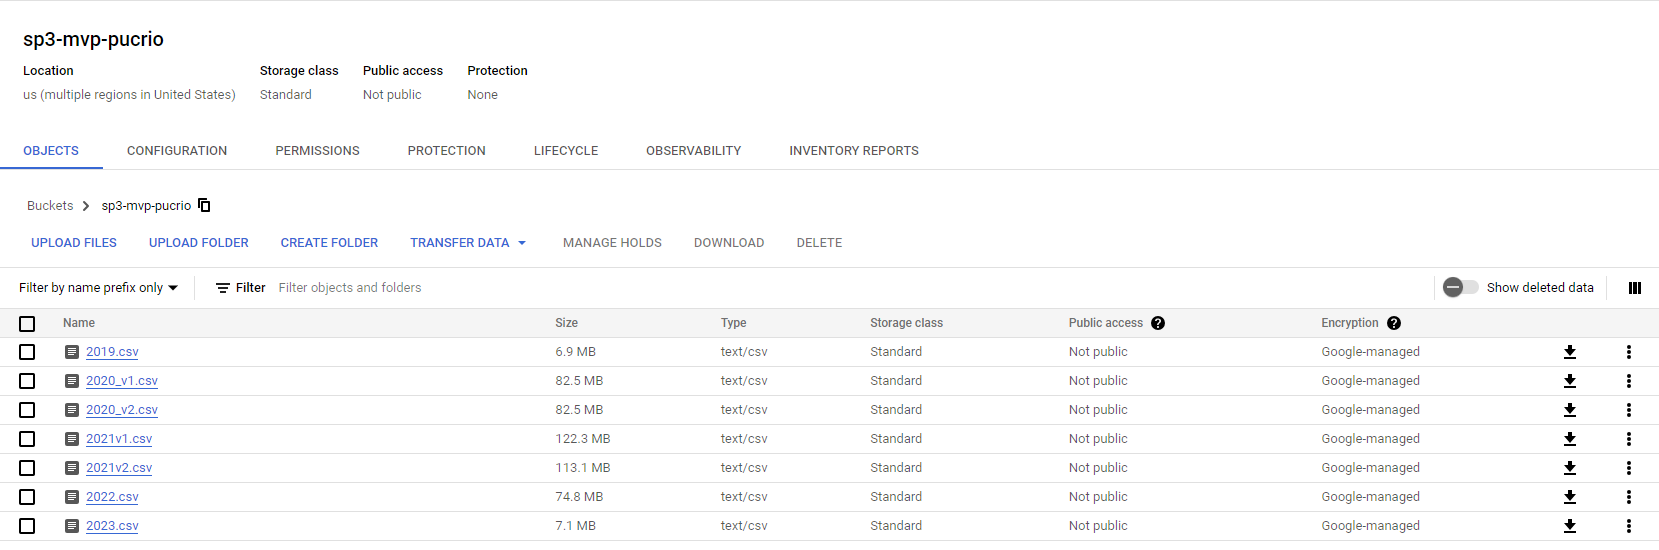

**OBS:** por conta do tamanho de cada arquivo, os atributos que não iremos utilizar foram retirados previamente.

## 2.3. Modelagem

### 2.3.1. Modelo de Entidade e Relacionamento

Identifiquei que os datasets do SRAG disponibilizados, possuem estruturas diferentes ao decorrer do tempo.

Tendo isso em vista, elaborei o modelo abaixo de acordo com os atributos que iremos utilizar, respeitando as restrições de acordo com o dicionário de dados disponibilizado pela fonte Datasus.

Mantive a tabela flat que é disponiblizada pelo SRAG.

Para fazer o modelo de entidade e relacionamento, utilizei a ferramenta GenMyModel (https://app.genmymodel.com/api/login)

DatabaseDiagram_2.svg

### 2.3.2. Catálago de Dados

**Campo obrigatório:** é aquele cuja ausência de dado impossibilita a inclusão do registro no sistema.

**Campo essencial:** é aquele que, apesar de não ser obrigatório, registra dado necessário à investigação do caso ou ao cálculo de indicador epidemiológico ou operacional.

**Campo interno:** é aquele que apesar de não constar na ficha, é preenchido automaticamente pelo sistema, não aparece no display da tela e é persistido no banco de dados.

**Campo opcional:** é aquele que só deve ser preenchido caso seja necessário, aparece no display da tela e é persistido no banco de dados.

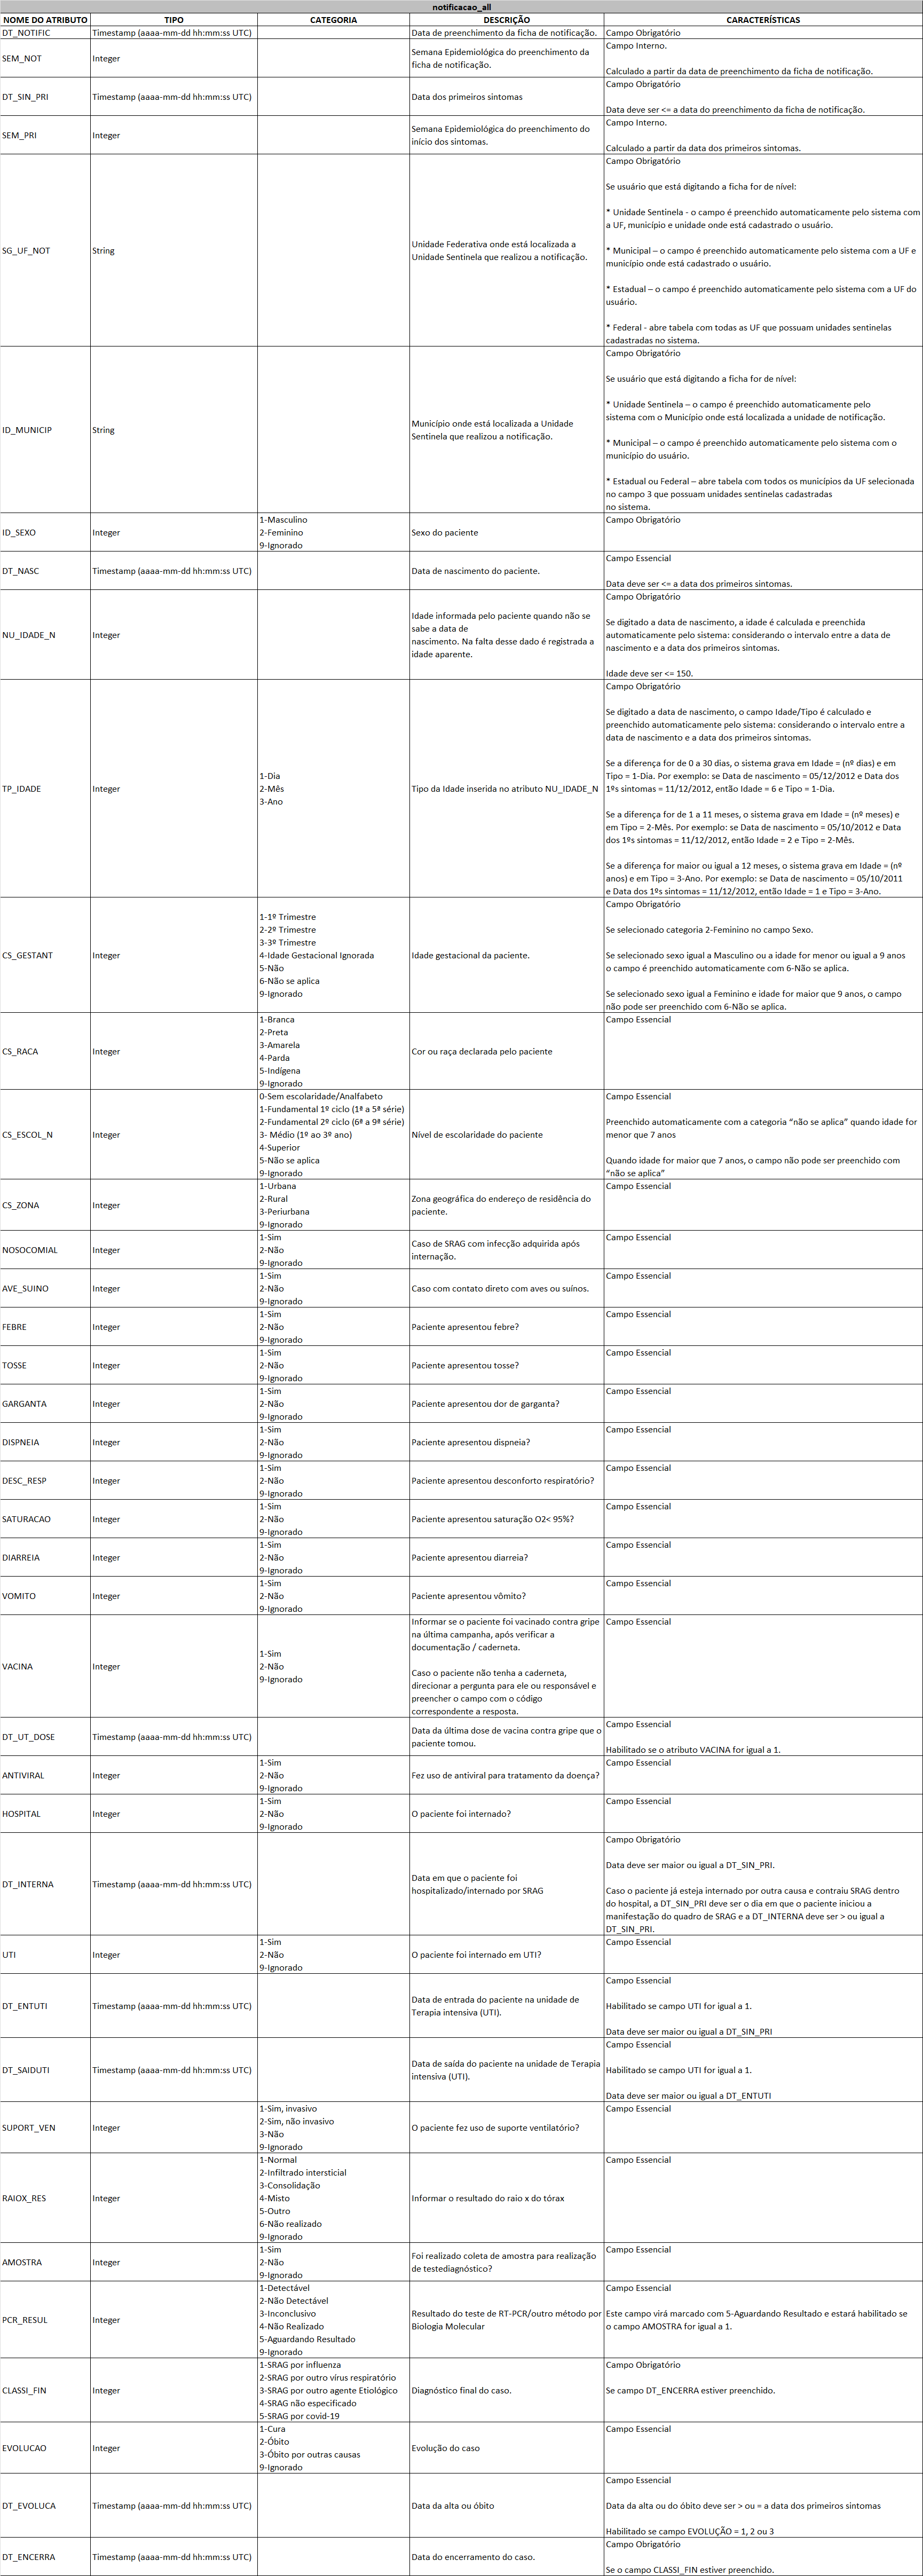

## 2.4. Carga

### 2.4.1. Criação da intância no Data Fusion

No Google Cloud, utilizamos o Data Fusion criar um pipeline de leitura, ajustes e carga dos dados.

- Instância criada no Data Fusion:
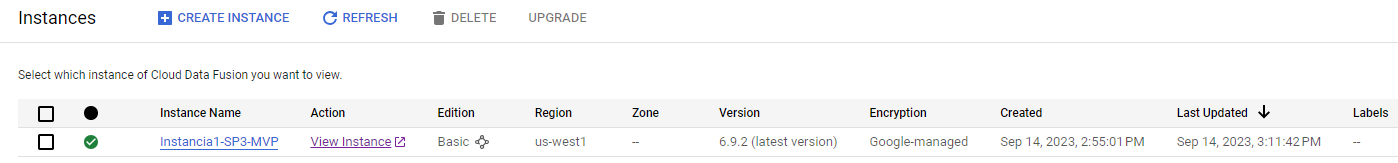

### 2.4.2. Criação do Pipeline no Data Fusion

Com a instância em execução, criamos um pipeline para leitura dos datasets, ajustes necessário e carga no DW.

* Pipeline criado

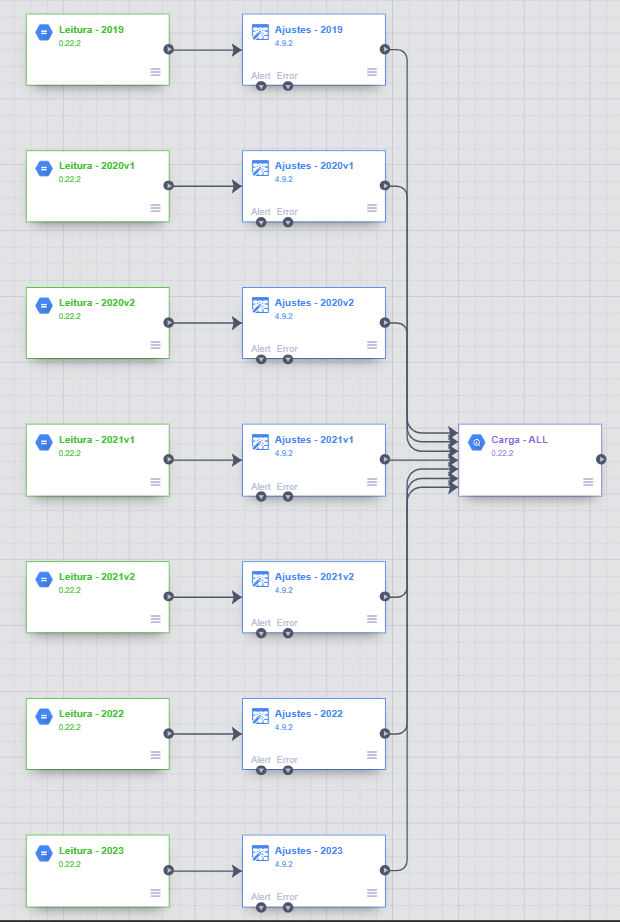

### 2.4.3. Detalhamento do pipeline

Na sequência será detalhado cada etapa do pipeline criado.

#### 2.4.3.1 Leitura

* Nessa etapa fazemos a leitura dos datasets referentes a cada ano (2019, 2020v1, 2020v2, 2021v1, 2021v2, 2022 e 2023)

* Basicamente definimos o fomato de cada arquivo (no nosso caso escolhemos a opção delimitado) e a delimitação dos dados será por ";".

* Abaixo segue o exemplo da configuração da leitura de um dos datasets

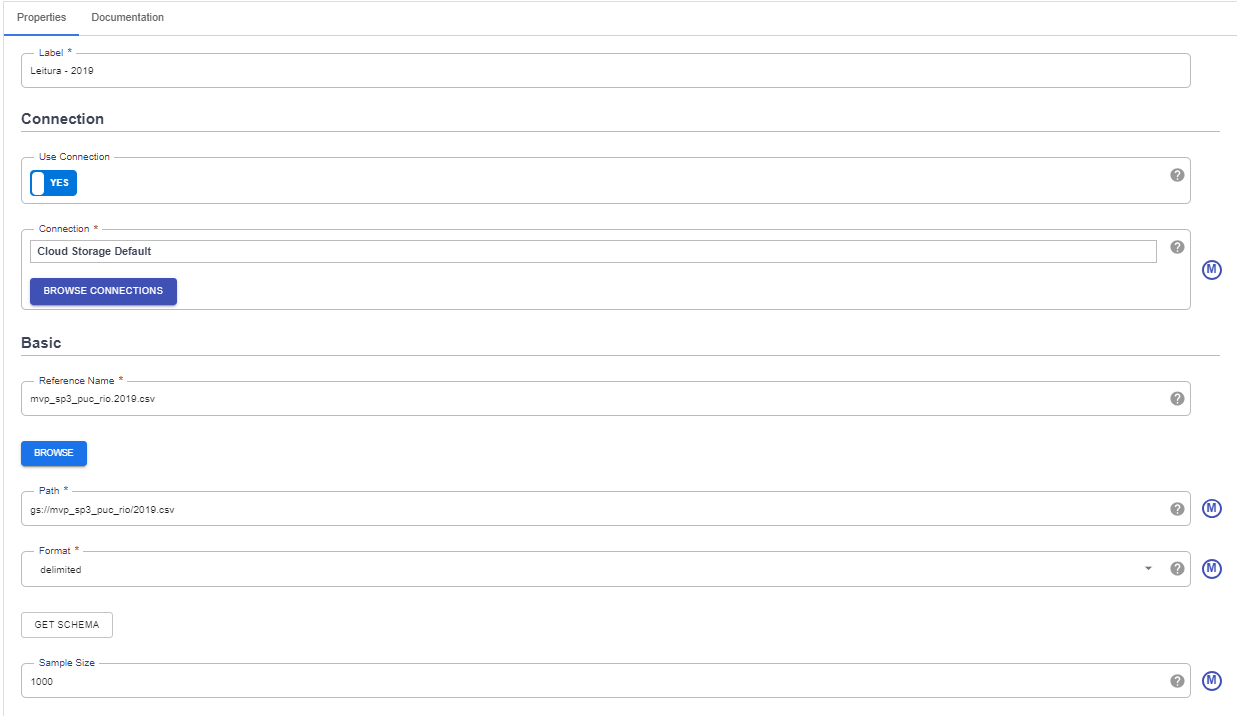
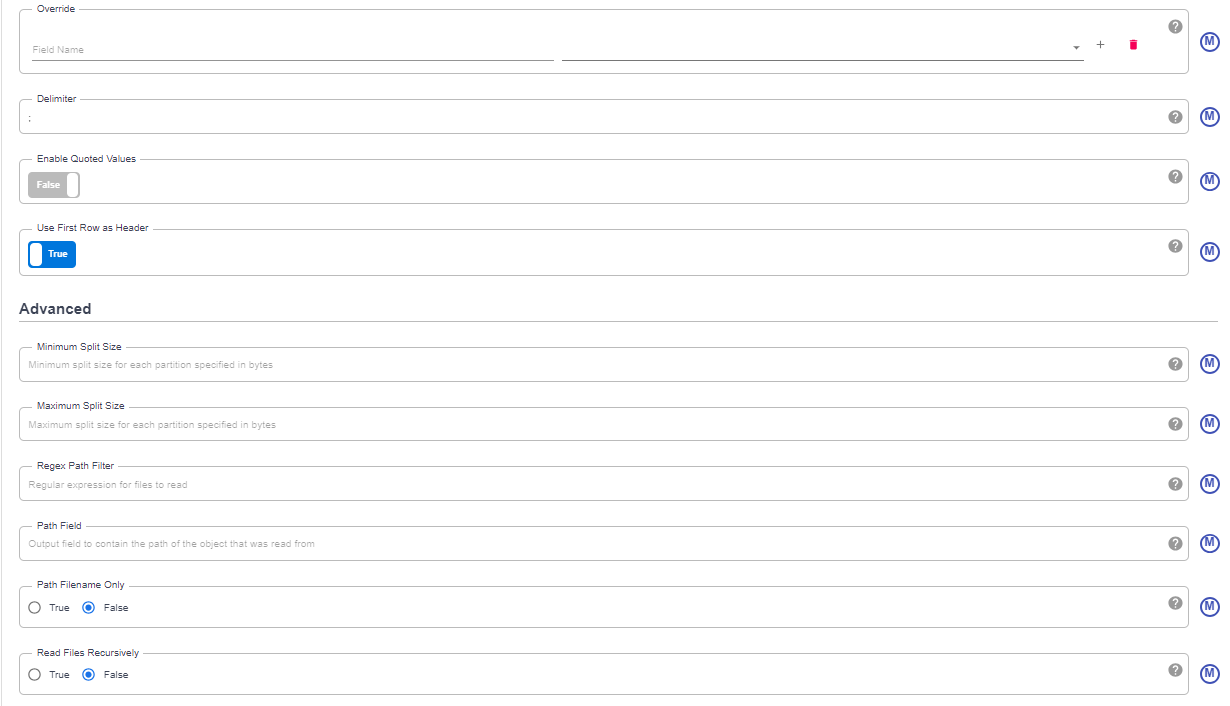
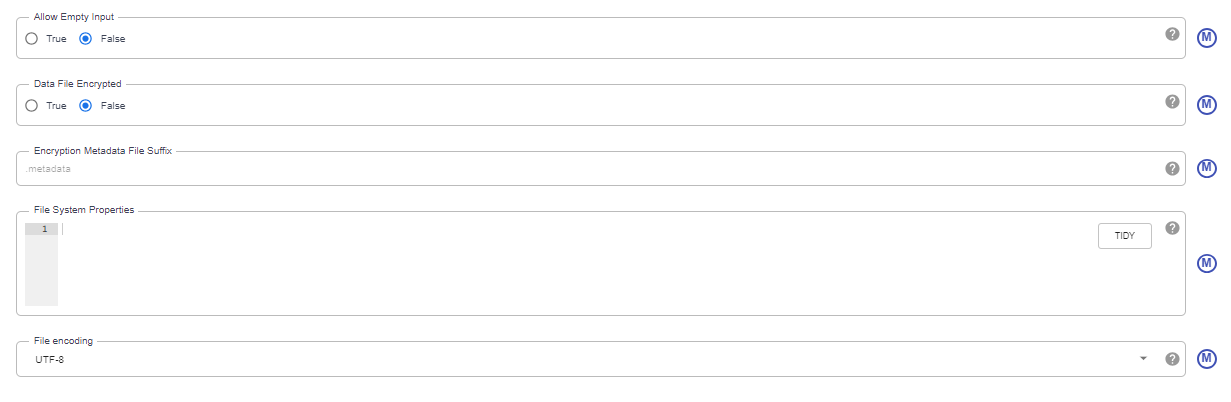

#### 2.4.3.2 Ajustes

* Nessa etapa iremos fazer os devidos ajustes em cada um dos nossos datasets a serem carregados, como por exmplo os formatos dos atributos, filtros, ajustes de valores faltantes dentre outros.

* utilizamos a ferramenta Wrangler para transformações dos dados.

* No nosso caso ajustamos o formato de alguns atributos, realizamos algumas substituições de valores e ajustamos alguns valores nulos.

* Abaixo segue o exemplo do Wrangler para um dos nossos datasets que serão carregados.

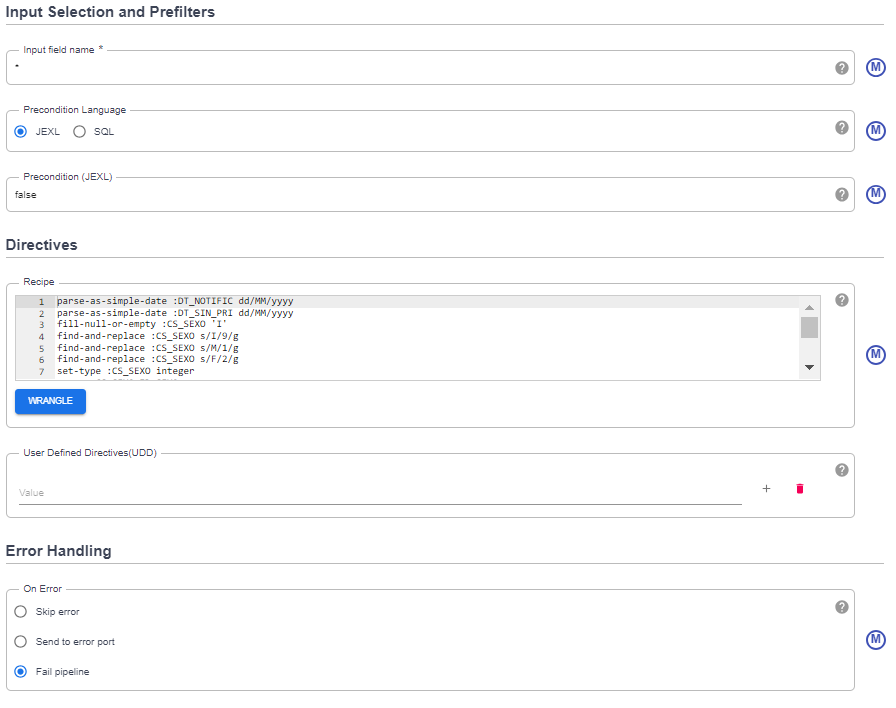

* Recipes

```
parse-as-simple-date :DT_NOTIFIC dd/MM/yyyy
parse-as-simple-date :DT_SIN_PRI dd/MM/yyyy
fill-null-or-empty :CS_SEXO 'I'
find-and-replace :CS_SEXO s/I/9/g
find-and-replace :CS_SEXO s/M/1/g
find-and-replace :CS_SEXO s/F/2/g
set-type :CS_SEXO integer
rename CS_SEXO ID_SEXO
parse-as-simple-date :DT_NASC dd/MM/yyyy
parse-as-simple-date :DT_UT_DOSE dd/MM/yyyy
parse-as-simple-date :DT_INTERNA dd/MM/yyyy
parse-as-simple-date :DT_ENTUTI dd/MM/yyyy
parse-as-simple-date :DT_SAIDUTI dd/MM/yyyy
parse-as-simple-date :DT_EVOLUCA dd/MM/yyyy
parse-as-simple-date :DT_ENCERRA dd/MM/yyyy
```

#### 2.4.3.3 Carga

* Para realizarmos a carga utilizamos o componente BigQuery do Data Fusion.

* Colocamos todas as saidas dos componentes de transformação (Wrangler) como input schema do componente BigQuery.

* Na sequência, configuramos o componente para fazer a carga dos dados na tabela "notificacao_all".

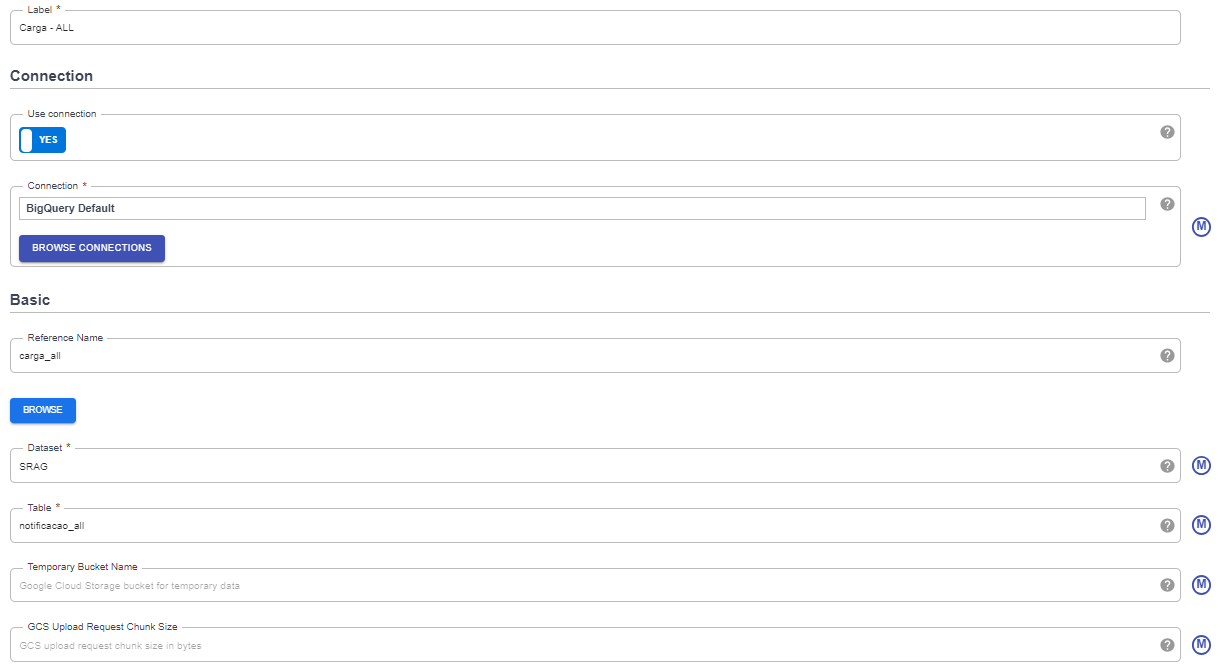
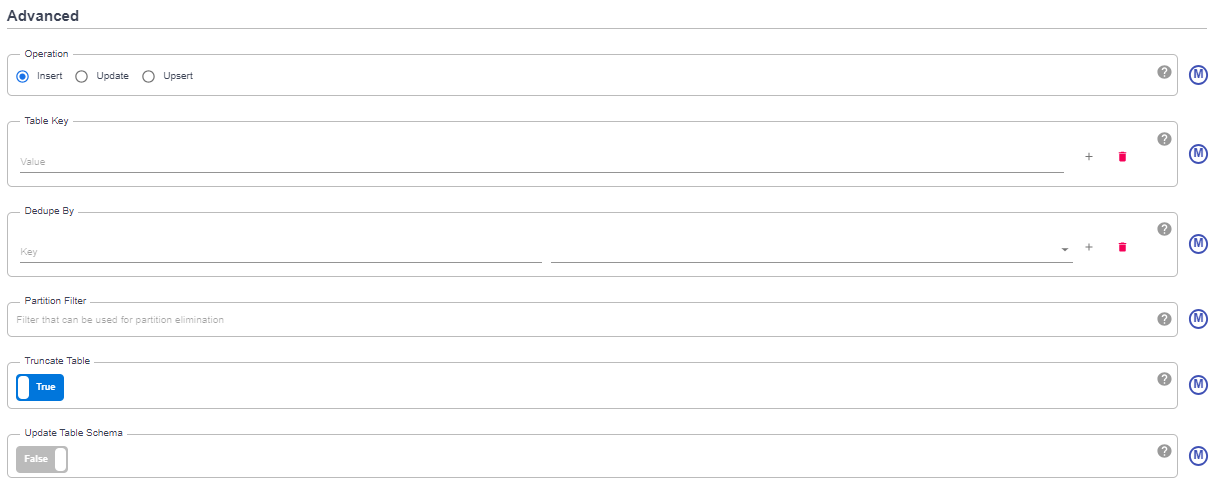
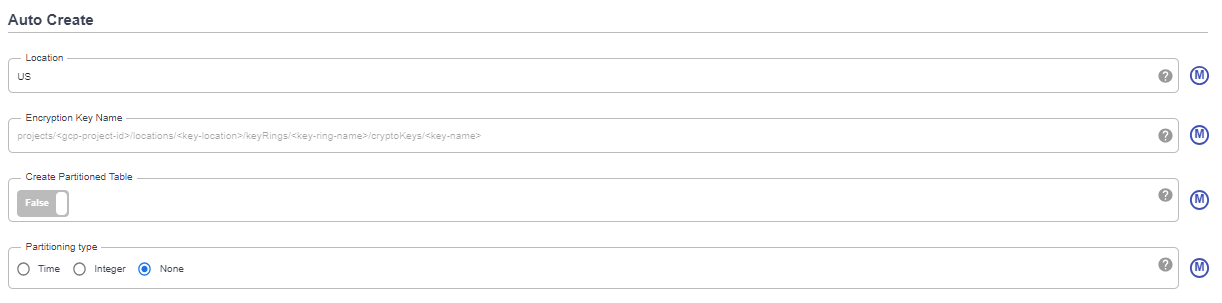

### 2.4.4. Execução do pipeline

Abaixo temos o pipeline finalizado em uma das execuções.

Conseguimos visualizar o status final, data e hora do início da execução, duração da execução e alertas e erros.

Além disso também conseguimos visualizar a quantidade de registros e erros de cada etapa do pipeline.

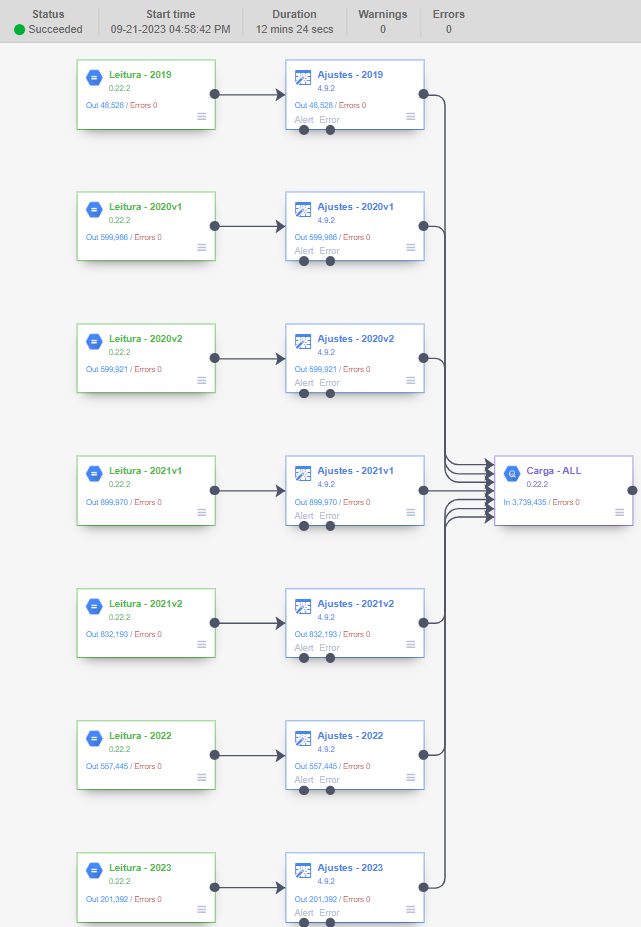

## 2.5. Análise

### 2.5.1 Qualidade de Dados

Abaixo será realiza a análise da qualidade dos dados para cada atributo do conjunto de dados apresentado acima, conforme o item 2.3.2. Catálogo de Dados.

#### 2.5.1.1. DT_NOTIFIC

Após a execução da query abaixo, foram encontrados 3 registro em que a DT_NOTIFIC está em 2018. Como estamos trabalhando com dados de 2019 a 2023, esses 3 registros estão fora de nosso range de atuação.

```
SELECT  EXTRACT(YEAR FROM DT_NOTIFIC) AS ANO,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```

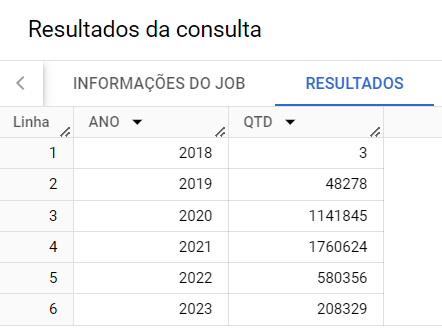

Como os 3 registros estão fora do nosso range de atuação, iremos retirar eles com a seguinte query:

```
DELETE FROM SRAG.notificacao_all
WHERE EXTRACT(YEAR FROM DT_NOTIFIC) = 2018
```

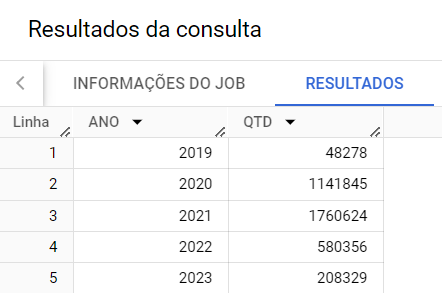

#### 2.5.1.2. SEM_NOT

Não foram encontrados erros de qualidade nesse atributo.

#### 2.5.1.3. DT_SIN_PRI

De acordo com a query abaixo, não foram encontrados registros em que a data dos primeiros sintomas seja maior que a data de notificação, respeitando a regra de negócio.

```
SELECT COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE DT_SIN_PRI > DT_NOTIFIC
```
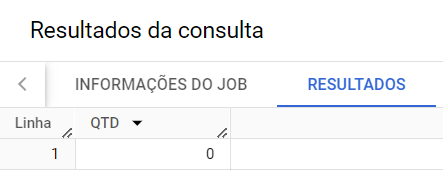


#### 2.5.1.4. SEM_PRI

Não foram encontrados erros de qualidade nesse atributo.

#### 2.5.1.5. SG_UF_NOT

Não foram encontrados erros de qualidade nesse atributo.

#### 2.5.1.6. ID_MUNICIP

Não foram encontrados erros de qualidade nesse atributo.

#### 2.5.1.7. ID_SEXO

Não foram encontrados erros de qualidade nesse atributo.

#### 2.5.1.8. DT_NASC

Na primeira análise desse atributo, verificamos com a query abaixo, se existe algum registro em que a Data de Nascimento do paciente seja maior do que a data dos primeiros sintomas.

```
SELECT  DT_NASC,
        DT_SIN_PRI
FROM SRAG.notificacao_all
WHERE DT_NASC > DT_SIN_PRI
```
Foi encontrado 1 registro em que não é respeitado a regra de negócio.

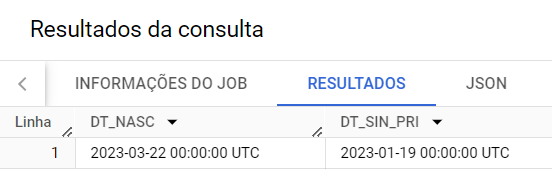

Nesse caso, opitamos por remover esse registro do nosso DW com a query abaixo:

```
DELETE FROM SRAG.notificacao_all
WHERE DT_NASC > DT_SIN_PRI
```
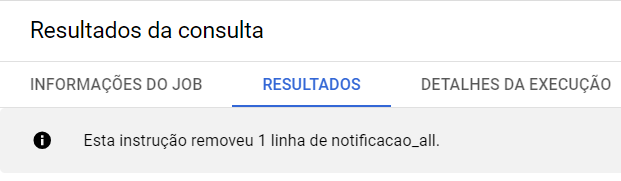



Além do check de integridade acima, também verificamos os registros em que a Data de Nascimento do paciente é nulo. Porém isso poderá acontecer de acordo com a regra de negócio, desde que o atributo Idade do Paciente (NU_IDADE_N) esteja preenchido com a idade real ou aparente do paciente.

Com a query abaixo verificamos que temos 3.742 registros em que a data de nascimento é nulo, mas que a idade está preenchida corretamente seguindo a regra de negócio.

```
SELECT COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE DT_NASC IS NULL
AND NU_IDADE_N IS NOT NULL
```
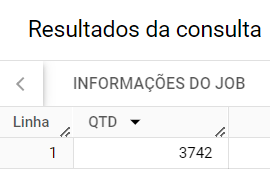




#### 2.5.1.9. NU_IDADE_N

Não foram encontrados erros de qualidade nesse atributo.

#### 2.5.1.10. TP_IDADE

Não foram encontrados erros de qualidade nesse atributo.

#### 2.5.1.11. CS_GESTANT

Analisando esse atributo, identificamos inicialmente que 787 registro possui o valor 0, o que é esperado de acordo com o dicionário de dados.

```
SELECT  COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE CS_GESTANT = 0
```

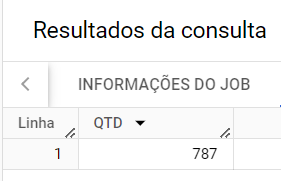



Identificamos com a query abaixo que dos 787 registros apontados acima, 161 registros o sexo é indeterminado ( igual a 9 ).


```
SELECT  COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE CS_GESTANT = 0
AND ID_SEXO = 9
```
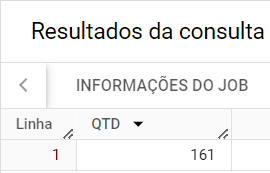

Para essa situação, iremos executar a query abaixo para atualizar o atributo CS_GESTANT para o código 9 (Ignorado).

```
UPDATE SRAG.notificacao_all
SET CS_GESTANT = 9
WHERE CS_GESTANT = 0
AND ID_SEXO = 9
```
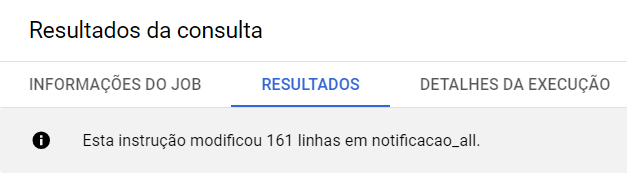




Ainda dos 787 registros com o valor do atributo CS_GESTANT = 0, foram encontrados 127 registros em que o atributo ID_SEXO = 1, ou seja, Masculino.

```
SELECT  COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE CS_GESTANT = 0
AND ID_SEXO = 1
```
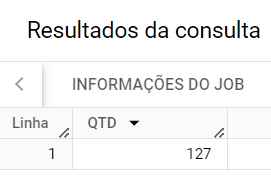

Nesse caso iremos atualizar o atributo CS_GESTANT para o valor 6 (Não se aplica), conforme esperado pelo dicionário de dados.

Abaixo segue a query de atuaização dos regsitros e o resultado da execução:


```
UPDATE SRAG.notificacao_all
SET CS_GESTANT = 6
WHERE CS_GESTANT = 0
AND ID_SEXO = 1
```
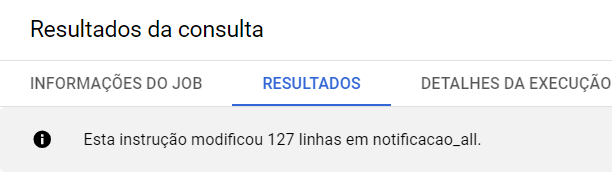




Ainda segundo o dicionário de dados, o CS_GESTANT deve ser igual a "6 - Não se aplica" quando a idade do paciente for menor ou igual a 9 anos de idade. Com a query abaixo é possivel observar que temos 474 registros que estão fora dessa regra.

```
SELECT  COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE CS_GESTANT = 0
AND ID_SEXO = 2
AND TP_IDADE = 3
AND NU_IDADE_N <= 9
```
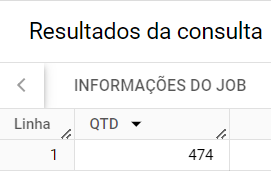

Vamos utilizar a query abaixo para atualizar esses 474 registros e atualizar o atributo CS_GESTANT para 6 (Não se aplica) para que eles fiquem de acordo com a regra de negócio.

```
UPDATE SRAG.notificacao_all
SET CS_GESTANT = 6
WHERE CS_GESTANT = 0
AND ID_SEXO = 2
AND TP_IDADE = 3
AND NU_IDADE_N <= 9
```
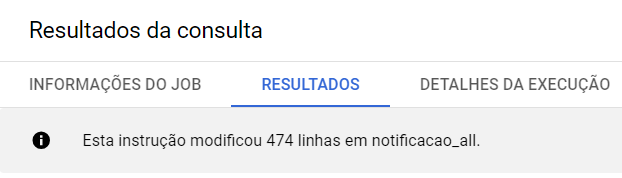





Ainda temos 25 registros que se encontram com o atributo CS_GESTANT = 0. Podemos reparar que esses registro também são de pacientes com idade menor ou igual a 9 anos, tendo em vista que o atributo TP_IDADE é igual a 1 (dia) ou 2 (mês). Nesse caso iremos utilizar a query abaixo para atualizar também esses registros.

```
UPDATE SRAG.notificacao_all
SET CS_GESTANT = 6
WHERE CS_GESTANT = 0
AND ID_SEXO = 2
AND TP_IDADE IN (1,2)
```
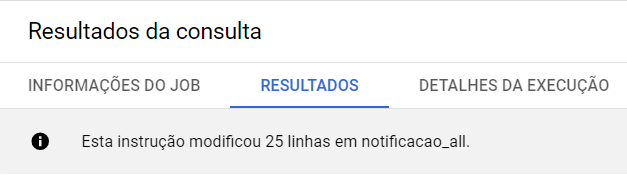



#### 2.5.1.12. CS_RACA

Foram identificados 47.008 registros em que o atributo CS_RACA está nulo.

```
SELECT  CS_RACA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
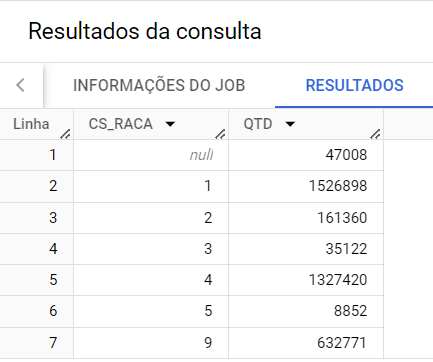

Para ficar de acordo com o dicionário de dados, iremos atualizar esses valores nulos para o valor 9 (Ignorado).

```
UPDATE SRAG.notificacao_all
SET CS_RACA = 9
WHERE CS_RACA IS NULL
```
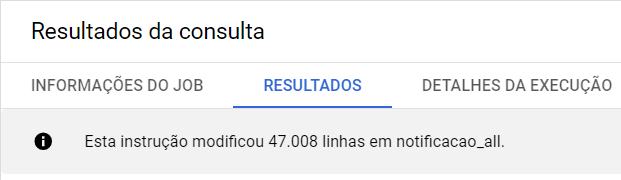


#### 2.5.1.13. CS_ESCOL_N

Na análise desse atributo, identificamos que existem diversos registros em que o paciente é menor ou igual a 7 anos e o atributo está diferente de 5 (Não se aplica), de acordo com o dicionário de dados.

```
SELECT  CS_ESCOL_N,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE ((NU_IDADE_N <= 7 AND TP_IDADE = 3)
OR (NU_IDADE_N <= 2555 AND TP_IDADE = 1)
OR (NU_IDADE_N <= 84 AND TP_IDADE = 2))
AND CS_ESCOL_N <> 5
GROUP BY 1
ORDER BY 1
```

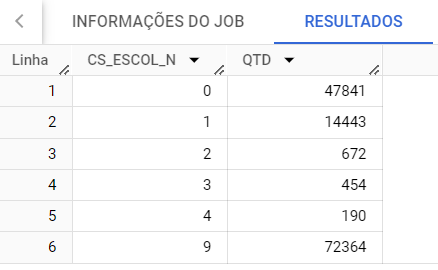

Com o update abaixo, vamos atualizar o atributo CS_ESCOL_N para 5 quando a idade for menor ou igual a 7 anos.

```
UPDATE SRAG.notificacao_all
SET CS_ESCOL_N = 5
WHERE ((NU_IDADE_N <= 7 AND TP_IDADE = 3)
OR (NU_IDADE_N <= 2555 AND TP_IDADE = 1)
OR (NU_IDADE_N <= 84 AND TP_IDADE = 2))
AND CS_ESCOL_N <> 5
```
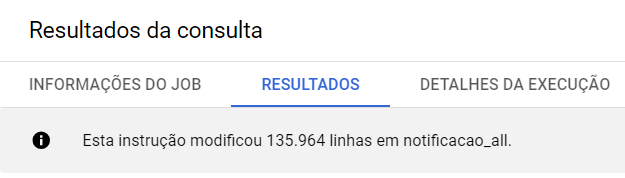




É possivel reparar que ainda temos 137.714 resgistros em que o atributo CS_ESCOL_N é nulo e a idade do paciente é menor que 7 anos.

```
SELECT  CS_ESCOL_N,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE CS_ESCOL_N IS NULL
AND ((NU_IDADE_N <= 7 AND TP_IDADE = 3)
OR (NU_IDADE_N <= 2555 AND TP_IDADE = 1)
OR (NU_IDADE_N <= 84 AND TP_IDADE = 2))
GROUP BY 1
ORDER BY 1
```
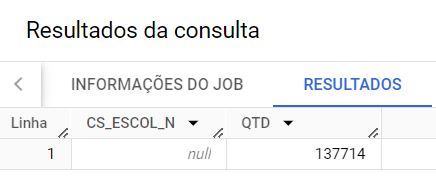

Nessa situação, iremos atualizar o atributo CS_ESCOL_N para igual a 5 (Não se aplica).

~~~
UPDATE SRAG.notificacao_all
SET CS_ESCOL_N = 5
WHERE CS_ESCOL_N IS NULL
AND ((NU_IDADE_N <= 7 AND TP_IDADE = 3)
OR (NU_IDADE_N <= 2555 AND TP_IDADE = 1)
OR (NU_IDADE_N <= 84 AND TP_IDADE = 2))
~~~
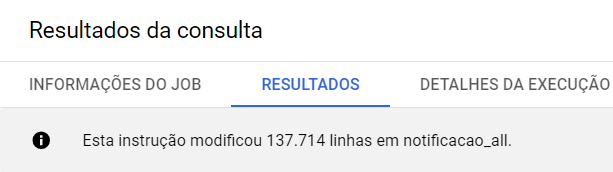




Ainda temos 1.118.607 resgistros em que o atributo CS_ESCOL_N é nulo e a idade do paciente é maior do que 7 anos.

```
SELECT  CS_ESCOL_N,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE CS_ESCOL_N IS NULL
AND ((NU_IDADE_N > 7 AND TP_IDADE = 3)
OR (NU_IDADE_N > 2555 AND TP_IDADE = 1)
OR (NU_IDADE_N > 84 AND TP_IDADE = 2))
GROUP BY 1
ORDER BY 1
```
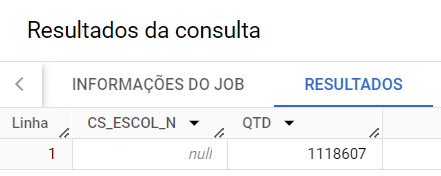

Vamos agora executar um UPDATE para passar o atributo CS_ESCOL_N para 9 (Ignorado) nesses casos.

~~~
UPDATE SRAG.notificacao_all
SET CS_ESCOL_N = 9
WHERE CS_ESCOL_N IS NULL
AND ((NU_IDADE_N > 7 AND TP_IDADE = 3)
OR (NU_IDADE_N > 2555 AND TP_IDADE = 1)
OR (NU_IDADE_N > 84 AND TP_IDADE = 2))
~~~
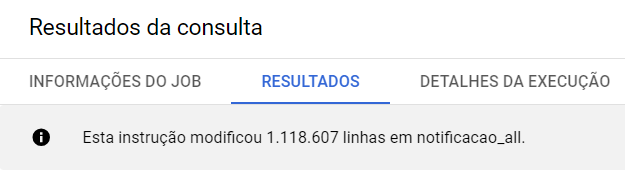

#### 2.5.1.14. CS_ZONA

Na análise desse atributo foram identificados 398.264 registros em que o atributo CS_ZONA é nulo.

```
SELECT  CS_ZONA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
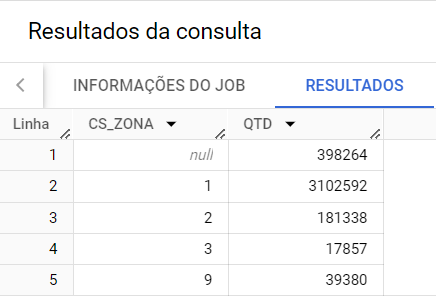

Nesses casos vamos atualizar o atributo nulo para igual a 9 (Ignorado).

~~~
UPDATE SRAG.notificacao_all
SET CS_ZONA = 9
WHERE CS_ZONA IS NULL
~~~
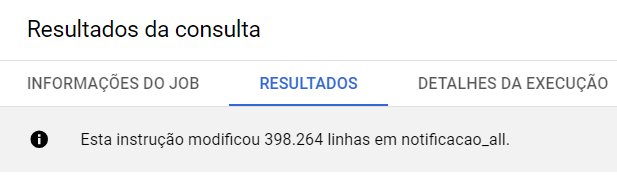


#### 2.5.1.15. NOSOCOMIAL

Foram identificados 660.771 registros com o valor nulo.

```
SELECT  NOSOCOMIAL,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
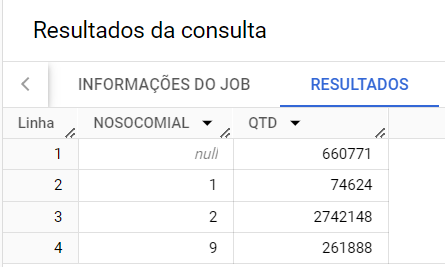

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET NOSOCOMIAL = 9
WHERE NOSOCOMIAL IS NULL
~~~
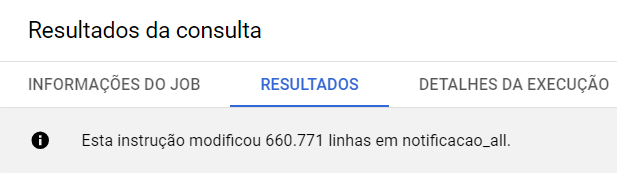

#### 2.5.1.16. AVE_SUINO

Foram identificados 666.255 registros com o valor nulo e 3.392 registro com um valor não esperado igual a 3.

```
SELECT  AVE_SUINO,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
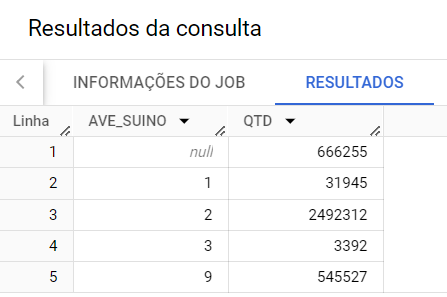

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET AVE_SUINO = 9
WHERE AVE_SUINO IS NULL
OR AVE_SUINO = 3
~~~
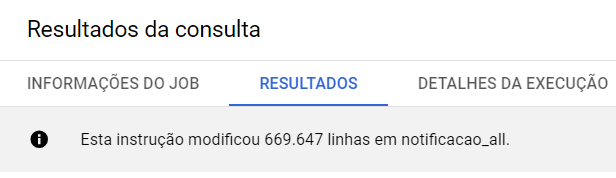

#### 2.5.1.17. FEBRE

Foram identificados 607.225 registros com o valor nulo.

```
SELECT  FEBRE,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
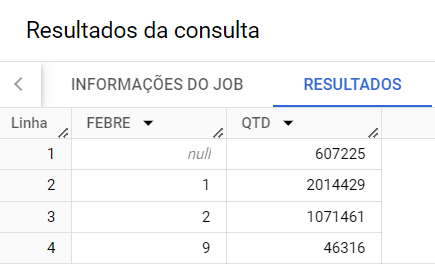

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET FEBRE = 9
WHERE FEBRE IS NULL
~~~
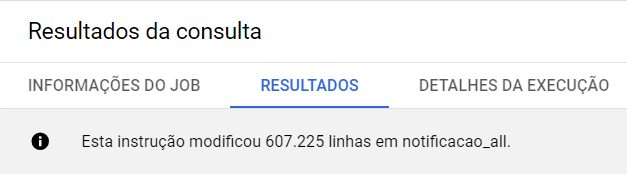

#### 2.5.1.18. TOSSE

Foram identificados 463.809 registros com o valor nulo.

```
SELECT  TOSSE,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
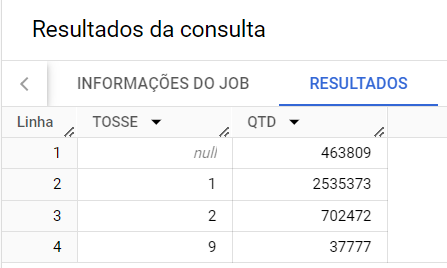

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET TOSSE = 9
WHERE TOSSE IS NULL
~~~
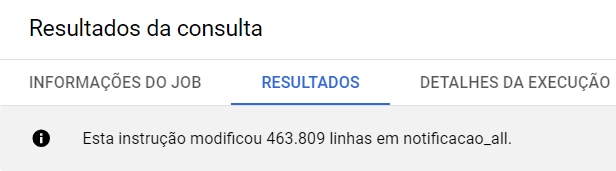

#### 2.5.1.19. GARGANTA

Foram identificados 1.071.345 registros com o valor nulo.

```
SELECT  GARGANTA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
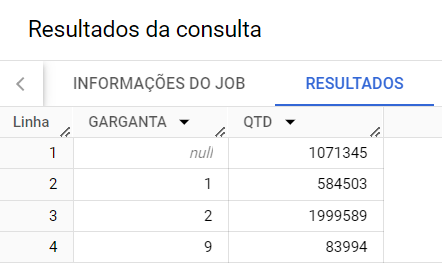

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET GARGANTA = 9
WHERE GARGANTA IS NULL
~~~
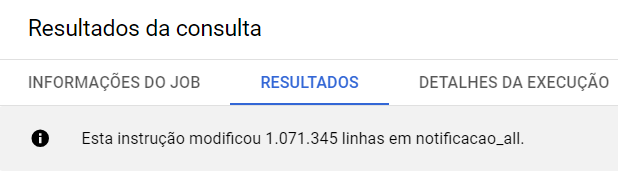

#### 2.5.1.20. DISPNEIA

Foram identificados 484.756 registros com o valor nulo.

```
SELECT  DISPNEIA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
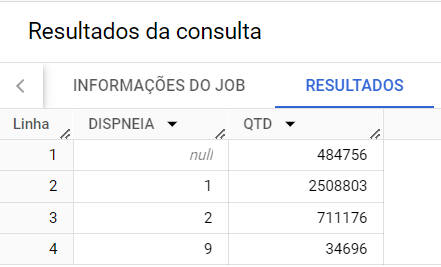

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET DISPNEIA = 9
WHERE DISPNEIA IS NULL
~~~
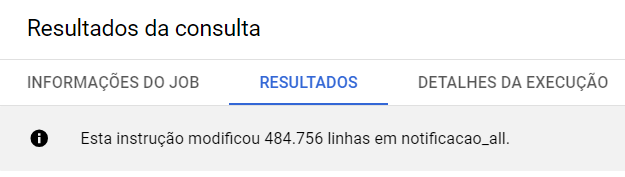

#### 2.5.1.21. DESC_RESP

Foram identificados 707.392 registros com o valor nulo.

```
SELECT  DESC_RESP,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
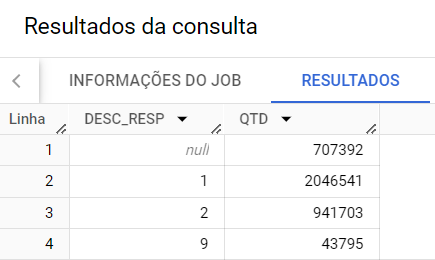

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET DESC_RESP = 9
WHERE DESC_RESP IS NULL
~~~
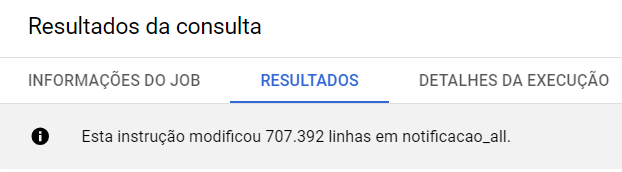

#### 2.5.1.22. SATURACAO

Foram identificados 639.998 registros com o valor nulo.

```
SELECT  SATURACAO,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
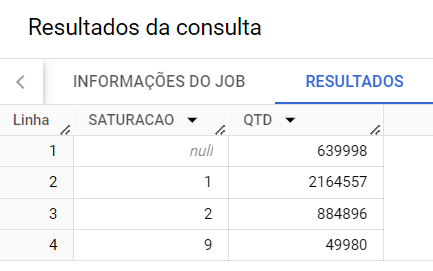

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET SATURACAO = 9
WHERE SATURACAO IS NULL
~~~
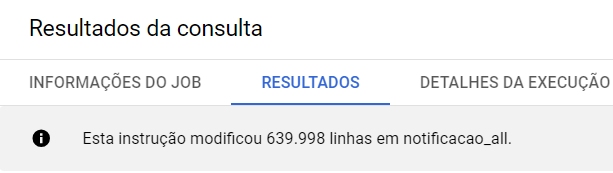

#### 2.5.1.23. DIARREIA

Foram identificados 1.120.533 registros com o valor nulo.

```
SELECT  DIARREIA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
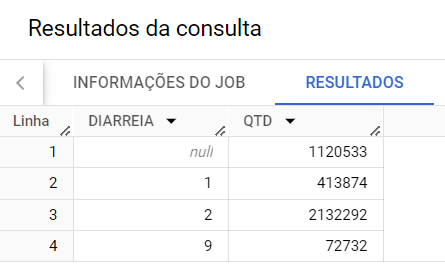

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET DIARREIA = 9
WHERE DIARREIA IS NULL
~~~
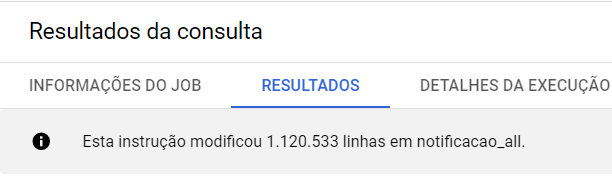

#### 2.5.1.24. VOMITO

Foram identificados 1.144.636 registros com o valor nulo.

```
SELECT  VOMITO,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
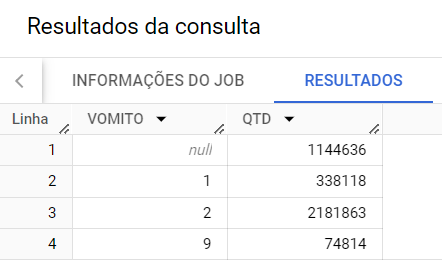

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET VOMITO = 9
WHERE VOMITO IS NULL
~~~
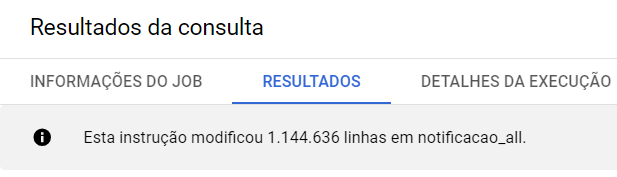

#### 2.5.1.25. VACINA

Foram identificados 1.068.158 registros com o valor nulo.

```
SELECT  VACINA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
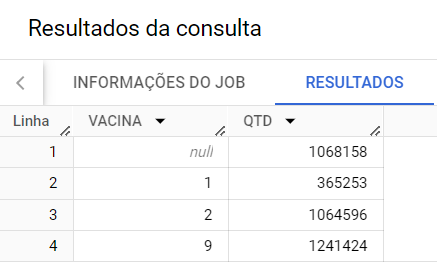

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET VACINA = 9
WHERE VACINA IS NULL
~~~
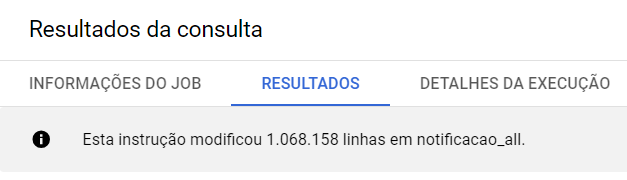

#### 2.5.1.26. ANTIVIRAL

Foram identificados 632.541 registros com o valor nulo.

```
SELECT  ANTIVIRAL,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
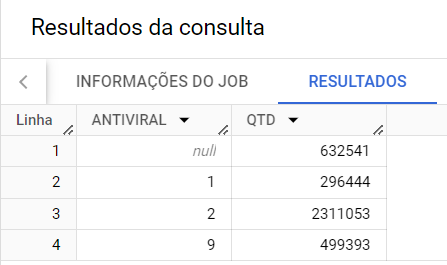

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET ANTIVIRAL = 9
WHERE ANTIVIRAL IS NULL
~~~
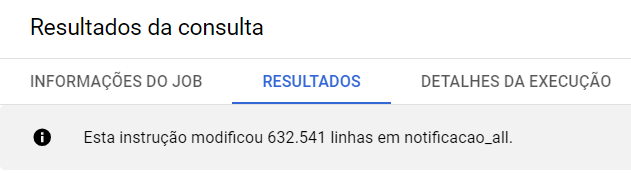

#### 2.5.1.27. HOSPITAL

Foram identificados 99.360 registros com o valor nulo.

```
SELECT  HOSPITAL,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
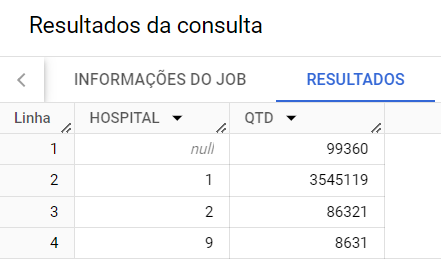

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET HOSPITAL = 9
WHERE HOSPITAL IS NULL
~~~
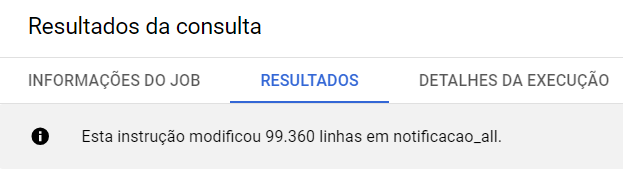

#### 2.5.1.28. DT_INTERNA

Foram identificados um total de 86 registros em que o atributo HOSPITAL é igual a 9 (Ignorado) ou igual a 2 (Não teve internação) e o atributo DT_INTERNA não é nulo.

```
SELECT  HOSPITAL,
        EXTRACT(YEAR FROM DT_INTERNA) AS ANO_DT_INTERNA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE HOSPITAL IN (2, 9)
AND DT_INTERNA IS NOT NULL
GROUP BY 1,2
ORDER BY 1,2
```
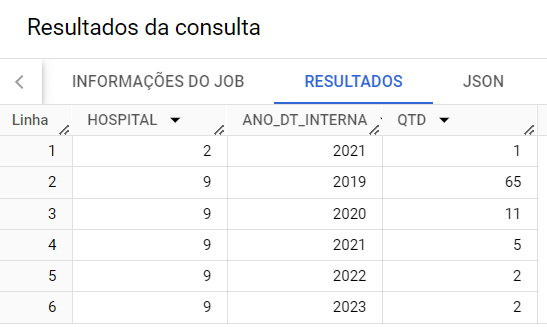

Nesses casos iremos atualizar o atributo DT_INTERNA para nulo com a query abaixo para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET DT_INTERNA = null
WHERE HOSPITAL IN (2,9)
AND DT_INTERNA IS NOT NULL
~~~
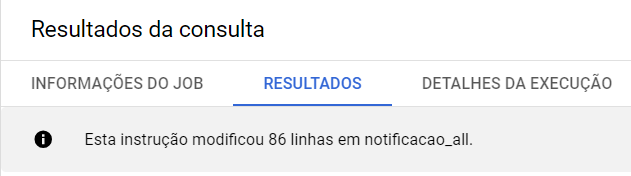

De acordo com a query abaixo, identificamos também 59.499 registros em que o atributo HOSPITAL é igual a 1 (Sim, teve internação) e o atributo DT_INTERNA é nulo.

```
SELECT  HOSPITAL,
        EXTRACT(YEAR FROM DT_NOTIFIC) AS ANO_DT_NOTIFIC,
        EXTRACT(YEAR FROM DT_INTERNA) AS ANO_DT_INTERNA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE HOSPITAL = 1
AND DT_INTERNA IS NULL
GROUP BY 1,2,3
ORDER BY 1,2,3
```
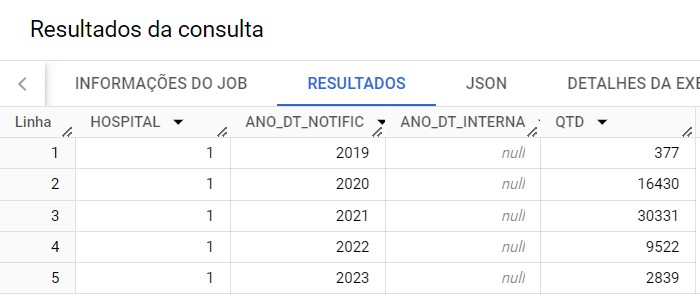

Nesse caso, iremos manter os dados como estão para não distorcer nossas perguntas mais a frente, apesar de não estar de acordo com a regra de negócio.

Também foram encontrados um total de 16.386 registros em que o atributo DT_INTERNA é menor que a DT_SIN_PRI.

```
SELECT  HOSPITAL,
        EXTRACT(YEAR FROM DT_NOTIFIC) AS ANO_DT_NOTIFIC,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE DT_INTERNA < DT_SIN_PRI
GROUP BY 1,2
ORDER BY 1,2
```
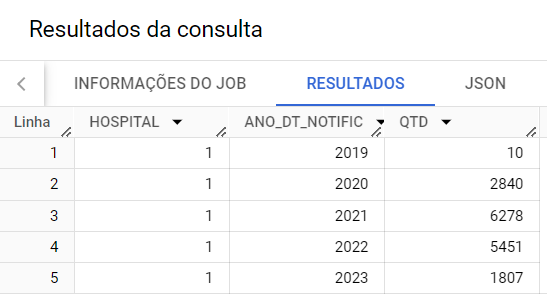

Como esses casos estão divergindo da regra de negócio de acordo com o dicionário de dados, optamos por excluir esses registro para não impactar em nossas análises futuras.

~~~
DELETE FROM SRAG.notificacao_all
WHERE DT_INTERNA < DT_SIN_PRI
~~~
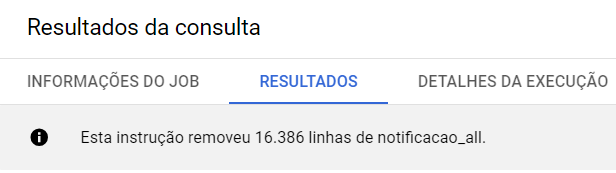


#### 2.5.1.29. UTI

Foram identificados 512.925 registros com o valor nulo.

```
SELECT  UTI,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
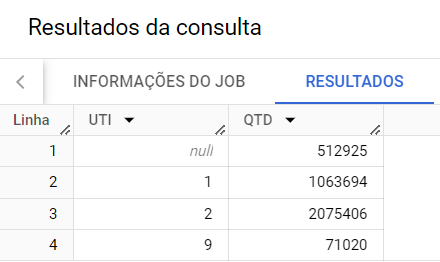

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET UTI = 9
WHERE UTI IS NULL
~~~
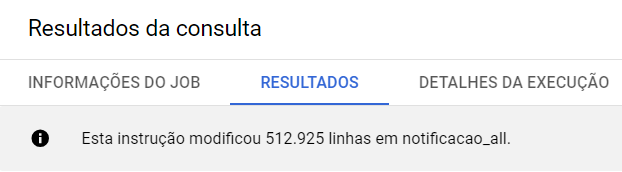

#### 2.5.1.30. SUPORT_VEN

Foram identificados 511.415 registros com o valor nulo.

```
SELECT  SUPORT_VEN,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
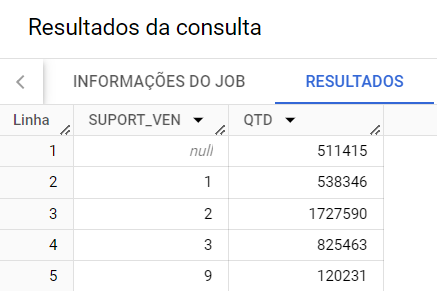

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET SUPORT_VEN = 9
WHERE SUPORT_VEN IS NULL
~~~
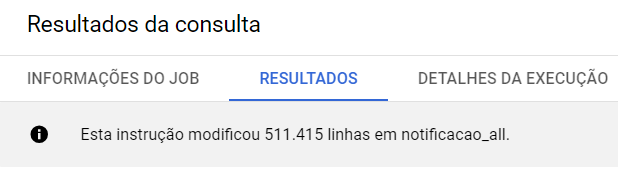

#### 2.5.1.31. RAIOX_RES

Foram identificados 1.441.219 registros com o valor nulo.

```
SELECT  RAIOX_RES,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
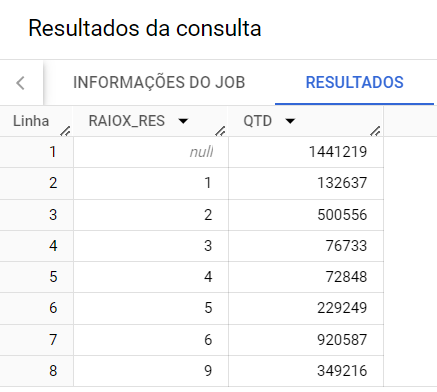

Vamos atribuir o valor 9 (Ignorado) com a query abaixo nesses casos para padronizar os resultados.

~~~
UPDATE SRAG.notificacao_all
SET RAIOX_RES = 9
WHERE RAIOX_RES IS NULL
~~~
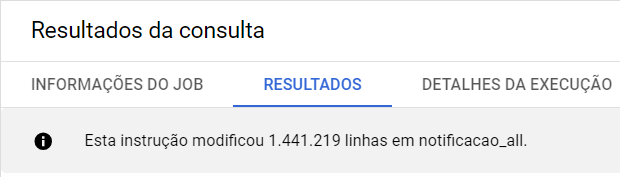

#### 2.5.1.32. AMOSTRA

Foram identificados 148.081 registros com o valor nulo.

```
SELECT  AMOSTRA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
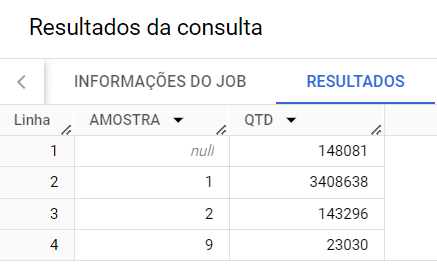

~~~
UPDATE SRAG.notificacao_all
SET AMOSTRA = 9
WHERE AMOSTRA IS NULL
~~~
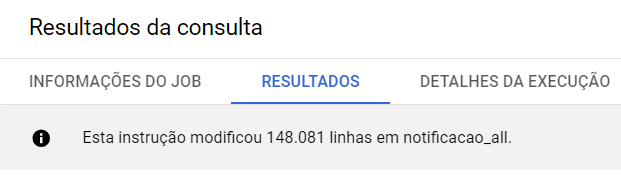

#### 2.5.1.33. PCR_RESUL

Foram identificados 368.144 registros com o valor nulo.

```
SELECT  PCR_RESUL,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```
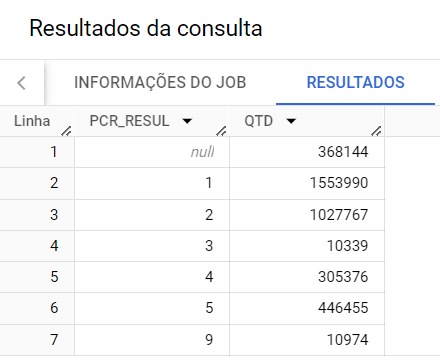

~~~
UPDATE SRAG.notificacao_all
SET PCR_RESUL = 9
WHERE PCR_RESUL IS NULL
~~~
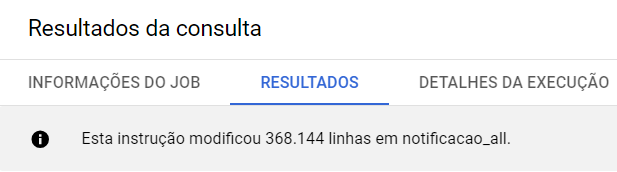

#### 2.5.1.34. CLASSI_FIN

Foram encontrados 1.265 registros em que o atributo DT_ENCERRA não é nulo e não temos uma classificação final no atributo CLASSI_FIN.

~~~
SELECT  CLASSI_FIN,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE CLASSI_FIN IS NULL
AND DT_ENCERRA IS NOT NULL
GROUP BY 1
ORDER BY 1
~~~
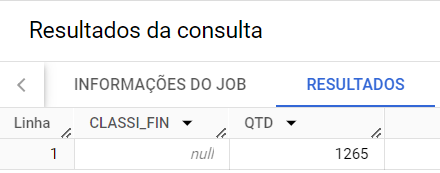

Como são relativamente poucos casos, iremos excluir esses registros para que nosso estudo não seja impactado.

~~~
DELETE FROM SRAG.notificacao_all
WHERE CLASSI_FIN IS NULL
AND DT_ENCERRA IS NOT NULL
~~~
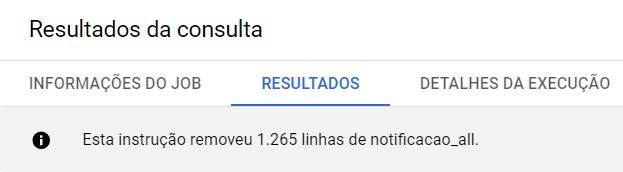

#### 2.5.1.35. EVOLUCAO

Foi observado que temos 61.185 registros em que o atributo EVOLUCAO é nulo, mas o atributo DT_ENCERRA já está preenchido, ou seja, o atributo EVOLUCAO preciva estar preenchido.

~~~
SELECT  EVOLUCAO,
        EXTRACT(YEAR FROM DT_ENCERRA) AS ANO_DT_ENCERRA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE DT_ENCERRA IS NOT NULL
AND EVOLUCAO IS NULL
GROUP BY 1,2
ORDER BY 1,2
~~~
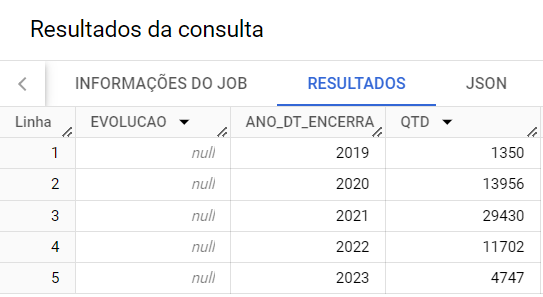

Nesse caso iremos preencher o atributo EVOLUCAO com o valor 9 (Ignorado) para que possamos manter os dados consistentes de acordo com a regra de negócio.

~~~
UPDATE SRAG.notificacao_all
SET EVOLUCAO = 9
WHERE DT_ENCERRA IS NOT NULL
AND EVOLUCAO IS NULL
~~~
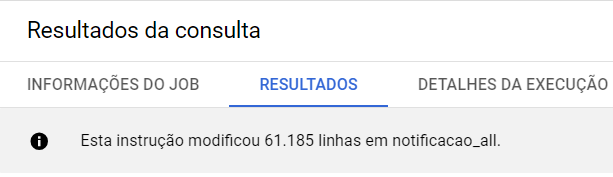

#### 2.5.1.36. DT_EVOLUCA

Foram encontrados 269.270 registros em que o atributo DT_EVOLUCA é nulo, porém o atributo EVOLUCAO é diferente de nulo. Também é possível reparar que o DT_ENCERRA também está preenchido.

~~~
SELECT  EXTRACT(YEAR FROM DT_EVOLUCA) AS ANO_DT_EVOLUCAO,
        EVOLUCAO,
        IF(DT_ENCERRA IS NULL,'N','S') AS ENCERRADO,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE DT_EVOLUCA IS NULL
AND EVOLUCAO IS NOT NULL
AND DT_ENCERRA IS NOT NULL
GROUP BY 1,2,3
ORDER BY 1,2,3
~~~
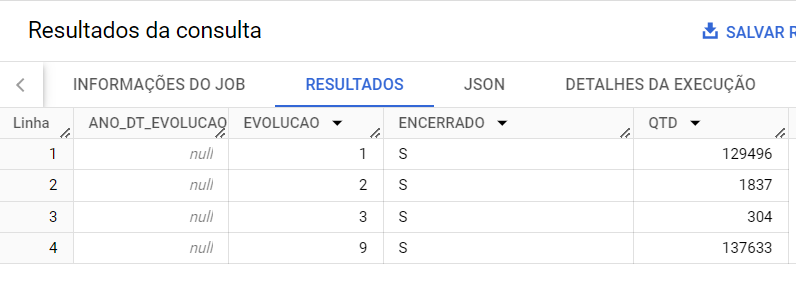

Nesse caso iremos atualizar o atributo DT_EVOLUCA com a DT_ENCERRA.

~~~
UPDATE SRAG.notificacao_all
SET DT_EVOLUCA = DT_ENCERRA
WHERE DT_EVOLUCA IS NULL
AND EVOLUCAO IS NOT NULL
AND DT_ENCERRA IS NOT NULL
~~~
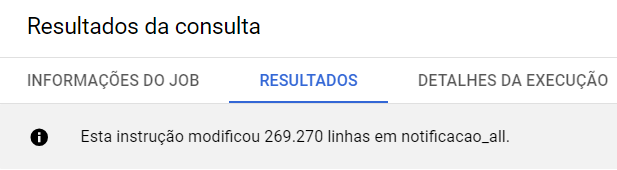

#### 2.5.1.37. DT_ENCERRA

Foram encontrados 26.861 registros com o atributo DT_ENCERRA nulo, sendo que os atributos DT_EVOLUCA e EVOLUCAO estão preenchidos.

~~~
SELECT  EXTRACT(YEAR FROM DT_ENCERRA) AS ANO_DT_ENCERRA,
        EXTRACT(YEAR FROM DT_EVOLUCA) AS ANO_DT_EVOLUCA,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE DT_ENCERRA IS NULL
AND DT_EVOLUCA IS NOT NULL
AND EVOLUCAO IN (1,2,3)
GROUP BY 1,2
ORDER BY 1,2
~~~
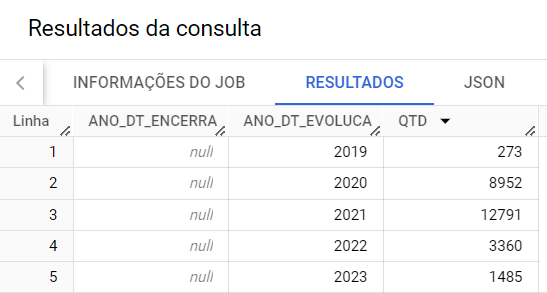

Nesses casos, vamos preencher o atributo DT_ENCERRA com a data do atributo DT_EVOLUCA.

~~~
UPDATE SRAG.notificacao_all
SET DT_ENCERRA = DT_EVOLUCA
WHERE DT_ENCERRA IS NULL
AND DT_EVOLUCA IS NOT NULL
AND EVOLUCAO IN (1,2,3)
~~~
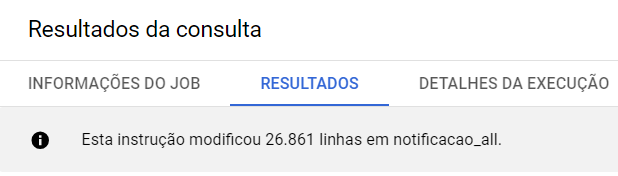

#### 2.5.1.38. DT_ENTUTI

Foram encontrados muitos erros de preenchimento nesse atributo, porém como não iremos utiliza-lo durante as análises desse projeto, não iremos ajusta-lo nesse momento.

#### 2.5.1.39. DT_SAIDUTI

Foram encontrados muitos erros de preenchimento nesse atributo, porém como não iremos utiliza-lo durante as análises desse projeto, não iremos ajusta-lo nesse momento.

#### 2.5.1.40. DT_UT_DOSE

Apesar do atributo DT_UT_DOSE ser habilitado quando o atributo VACINA for igual a 1, foram encontrados 152.632 registros onde a DT_UT_DOSE é nulo. Apesar de não ser um erro é algo a ser observado e que deve ser entendido do porque não estão sendo preenchidos. Provavelmente seria por conta do esquecimento da data da ultima dose pelo paciente.

~~~
SELECT  EXTRACT(YEAR FROM DT_UT_DOSE) AS ANO_DT_UT_DOSE,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
WHERE DT_UT_DOSE IS NULL
AND VACINA = 1
GROUP BY 1
ORDER BY 1
~~~
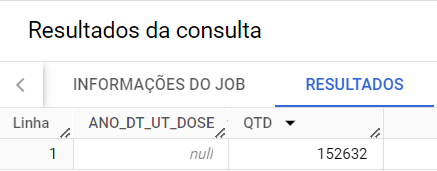

### 2.5.2 Solução do problema

Para detalhar a solução do nosso problema, irei apresentar as queries utilizadas na extração dos dados e os seus respectivos gráficos criados no Looker do Google Cloud Plataform.

#### 2.5.2.1. Quantidade de casos de SRAG por ano no Brasil.

SQL:
```
SELECT  EXTRACT(YEAR FROM DT_NOTIFIC) AS ANO_NOTIFICACAO,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1
ORDER BY 1
```

Gráfico:
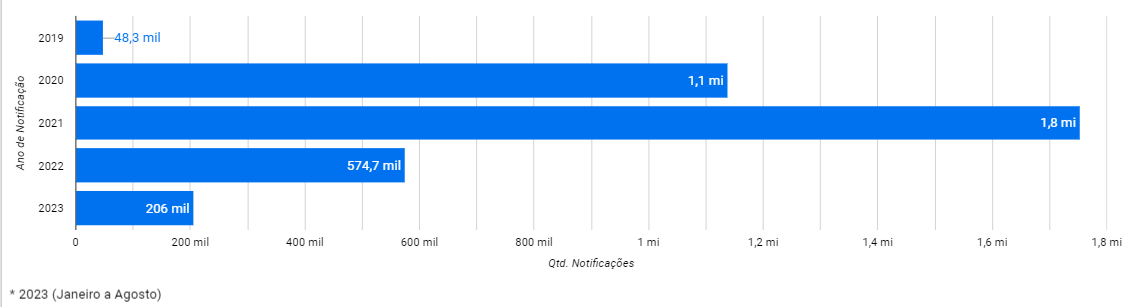

Comentários:
Em 2019 tínhamos em torno de 48 mil casos, mas observa-se um grande aumento a partir de 2020 que foi quando se iniciou a pandemia de Covid-19 atingindo mais de 1 milhão de casos.

Em 2021 atingimos em torno de 1,8 milhões de casos. Nesse mesmo ano iniciou-se a aplicação das vacinas contra o Covid-19 no Brasil, já no ano seguinte conseguimos diminuir consideravelmente a quantidade de casos, porém ainda com um número elevado com mais de 570 mil casos.

Em 2023, de Janeiro a Agosto, já contabilizamos aproximadamente 206 mil casos. De acordo com os gráficos seguintes, iremos observar que já passamos pelo período em que temos um aumento de casos, portanto esperamos que iremos ficar com algo em torno de 210 mil casos em 2023.

#### 2.5.2.2. Quantidade de casos de SRAG por estado e por ano.

SQL:
```
SELECT  SG_UF_NOT,
        EXTRACT(YEAR FROM DT_NOTIFIC) AS ANO_NOTIFICACAO,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1,2
```

Gráfico:
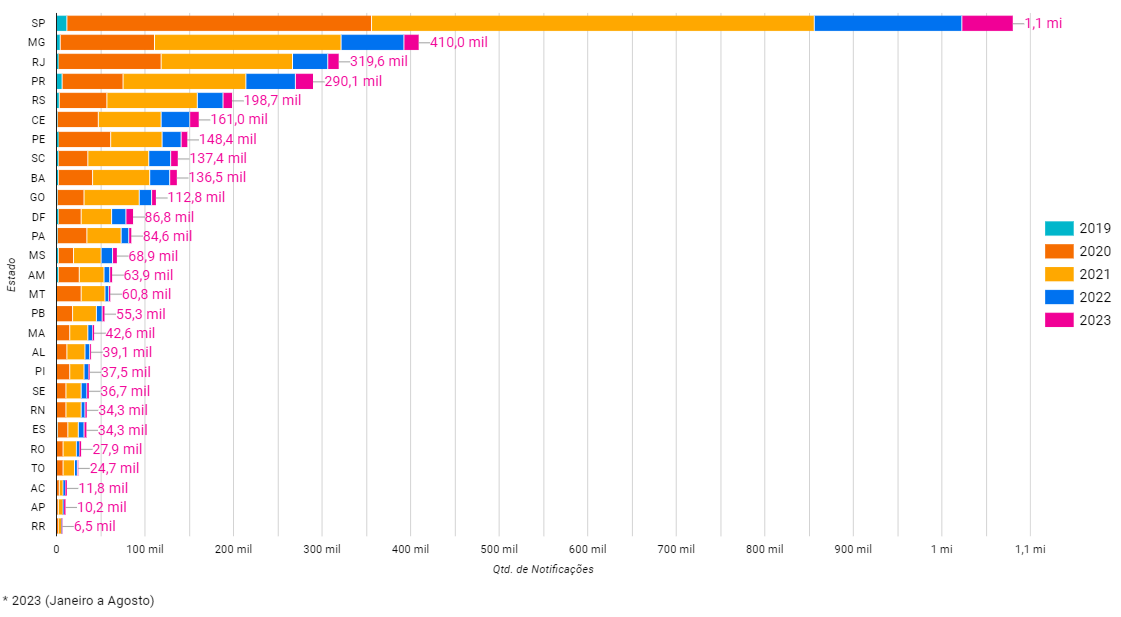

Comentários:
Podemos reparar que SP se destaca dos demais estados com relação a número de casos, mas isso também por conta do seu tamanho e poupulação.

Seria interessante cruzarmos a quantidade de casos notificados em relação a população de cada estado, para identificarmos o estado com a maior proporção de aumento de casos.

#### 2.5.2.3. Quais os meses em que temos mais casos de SRAG por ano.

SQL:
```
SELECT  EXTRACT(YEAR FROM DT_NOTIFIC) AS ANO_NOTIFICACAO,
        EXTRACT(MONTH FROM DT_NOTIFIC) AS MES_NOTIFICACAO,
        CASE EXTRACT(MONTH FROM DT_NOTIFIC)
          WHEN 1 THEN 'Janeiro'
          WHEN 2 THEN 'Fevereiro'
          WHEN 3 THEN 'Março'
          WHEN 4 THEN 'Abril'
          WHEN 5 THEN 'Maio'
          WHEN 6 THEN 'Junho'
          WHEN 7 THEN 'Julho'
          WHEN 8 THEN 'Agosto'
          WHEN 9 THEN 'Setembro'
          WHEN 10 THEN 'Outubro'
          WHEN 11 THEN 'Novembro'
          WHEN 12 THEN 'Dezembro'
          ELSE 'Outros'
        END AS MES,
        COUNT(*) AS QTD
FROM SRAG.notificacao_all
GROUP BY 1, 2, 3
ORDER BY 2, 1
```

Gráfico:
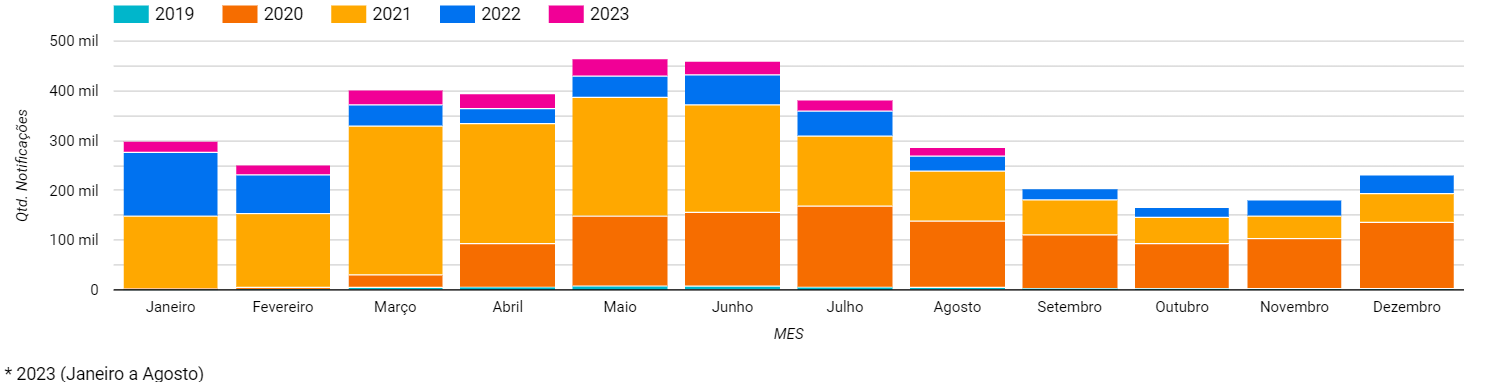

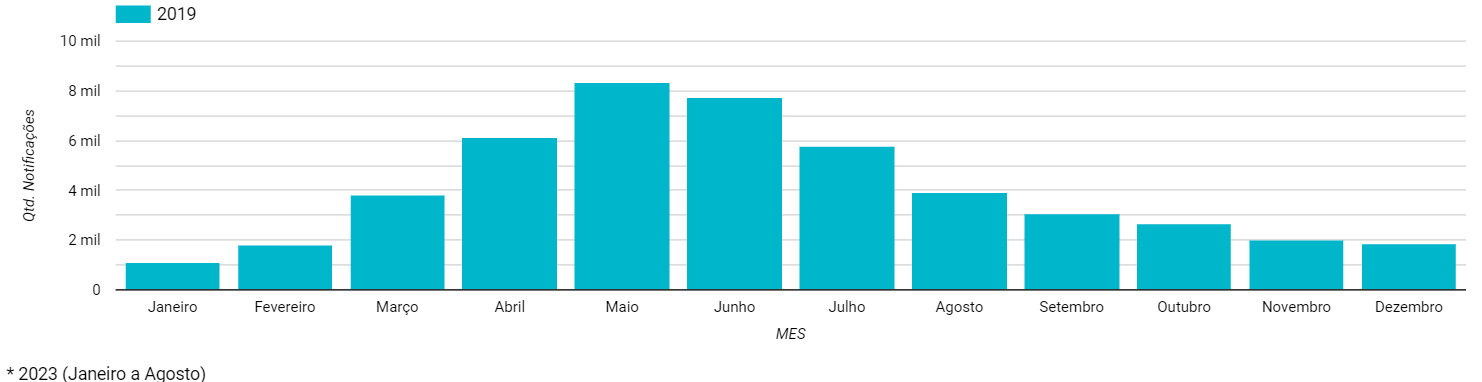

Comentários:
Quando olhamos para todos os anos no primeiro gráfico, fica difícil distinguimos o meses com maior número de casos por conta da pandemia. Então para responder a pergunta em questão optei por olhar apenas o ano de 2019 que corresponde a um momento sem a Pandemia.

Olhando apenas para os meses de 2019 no segundo gráfico, é possível reparar que o segundo trimestre é o período mais crítico.

####2.5.2.4. Quantidade de casos por mês e ano de acordo com a sua classificação.

SQL:
```
SELECT  DT_NOTIFIC,
        CASE CLASSI_FIN
          WHEN 1 THEN 'SRAG por influenza'
          WHEN 2 THEN 'SRAG por outro vírus respiratório'
          WHEN 3 THEN 'SRAG por outro agente Etiológico'
          WHEN 4 THEN 'SRAG não especificado'
          WHEN 5 THEN 'SRAG por covid-19'
          ELSE 'Outros'
        END AS CLASSIFICACAO
FROM SRAG.notificacao_all
ORDER BY 1, 2
```

Gráfico:
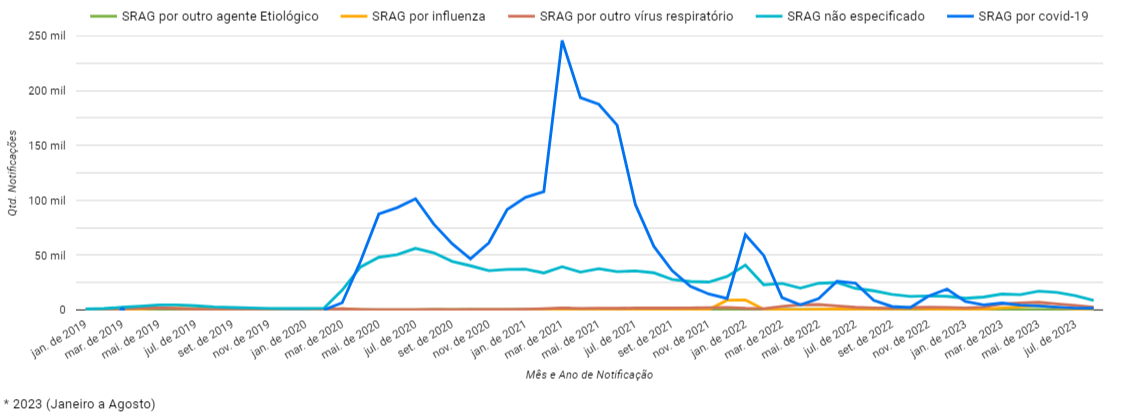

Comentários:

Podemos observar que a partir do início de 2020 começamos a ter uma aumento significativo de SRAG por conta da pandemia de covid-19. Observa-se também que além do SRAG por covid-19, também tivemos uma aumento considerável de SRAG não especificado, o que leva a crer que são os casos em que o paciente não evoluiu para um estado grave e/ou não foram feitos os devidos testes para confirmação do covid-19.

Também nos chama a atenção um leve pico no início de 2022 para SRAG por influenza.

#### 2.5.2.5. Quantidade de casos por mês e ano que evolui para óbito

SQL:
```
SELECT  DT_NOTIFIC,
        CASE EVOLUCAO
          WHEN 1 THEN 'Cura'
          WHEN 2 THEN 'Óbito'
          WHEN 3 THEN 'Óbito por outras causas'
          ELSE 'Outros'
        END AS EVOLUCAO
FROM SRAG.notificacao_all
WHERE EVOLUCAO IS NOT NULL
ORDER BY 1, 2
```

Gráfico:
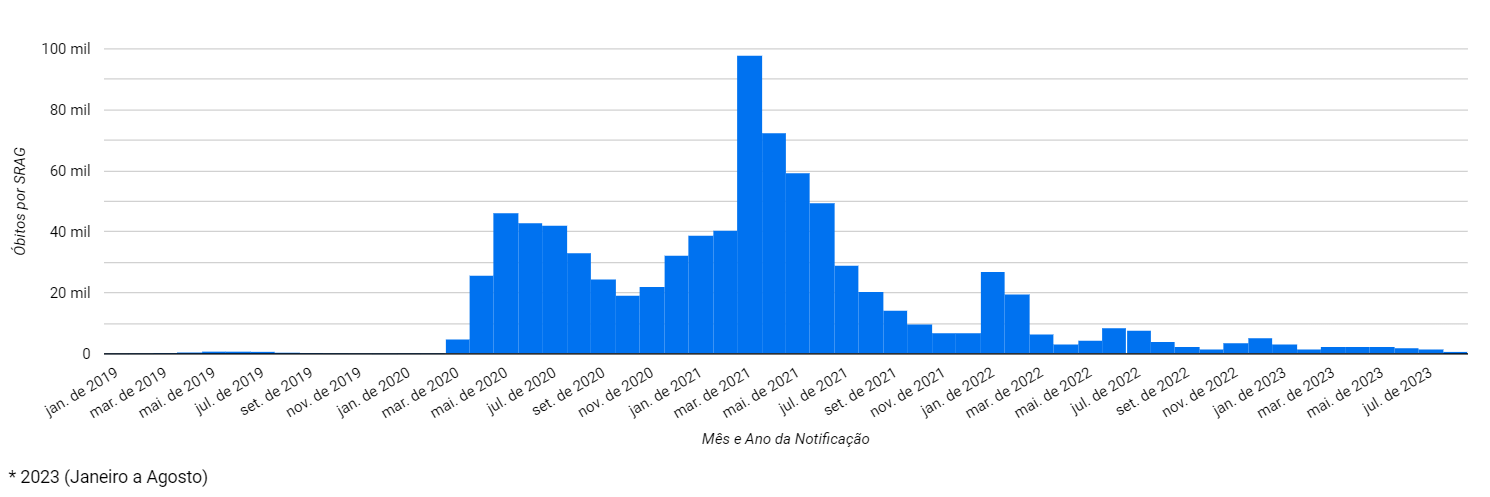

Comentários:

O início da pandemia em 2020 fez com que uma grande parte dos casos de SRAG evoluísse para Óbito.

Ainda hoje, em que a pandemia já está muito mais controlada do que em 2020 e 2022, ainda é possível reparar que estamos com uma quantidade de óbitos consideráveis, acima do que tivemos em 2019.

#### 2.5.2.6. Quantidade de casos por mês e ano em que o paciente está com a vacina contra gripe em dia.

SQL:
```
SELECT  DT_NOTIFIC,
        IF((DATE_DIFF(DT_SIN_PRI, DT_UT_DOSE, DAY) <= 365),'Y','N') AS VACINA_EM_DIA
FROM SRAG.notificacao_all
ORDER BY 1
```

Gráfico:
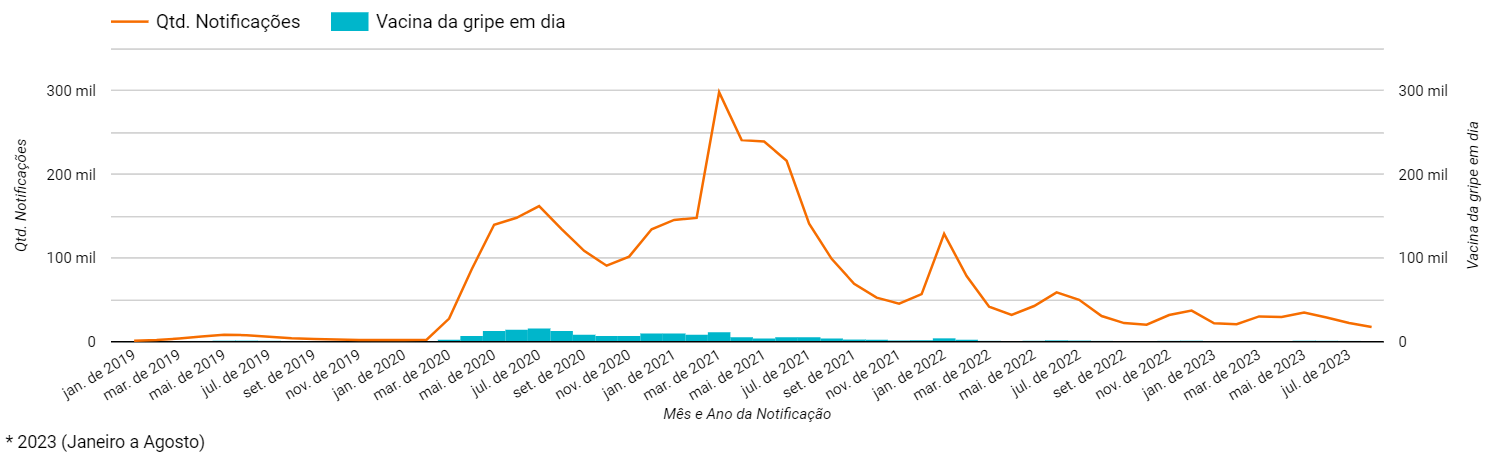

Comentários:

Infelizmente, ainda é possível reparar que a maior parte dos casos de SRAG o paciente não possui a vacinação contra gripe em dia. Verificamos um aumento durante o início da pandemia, mas olhando para final de 2022 e 2023 observamos que na maior parte dos casos o paciente não possui a vacinação em dia.

#### 2.5.2.7. Proporção dos casos de óbito por SRAG de acordo com o esquema de vacinação contra a gripe

Olhando para o gráfico do item 2.3.2.6. fiquei me questionando sobre proporção de casos de óbito por SRAG quando o paciente mantém a vacina da gripe em dia.

SQL:
```
SELECT  DT_NOTIFIC,
        EXTRACT(YEAR FROM DT_NOTIFIC) AS ANO_NOTIFICACAO,
        IF((DATE_DIFF(DT_SIN_PRI, DT_UT_DOSE, DAY) <= 365),'Vacina em dia','Vacina atrasada') AS VACINA_EM_DIA,
        CASE EVOLUCAO
          WHEN 1 THEN 'Cura'
          WHEN 2 THEN 'Óbito'
          WHEN 3 THEN 'Óbito por outras causas'
          ELSE 'Outros'
        END AS EVOLUCAO
FROM `SRAG.notificacao_all`
WHERE EVOLUCAO = 2
```

Grádfico:
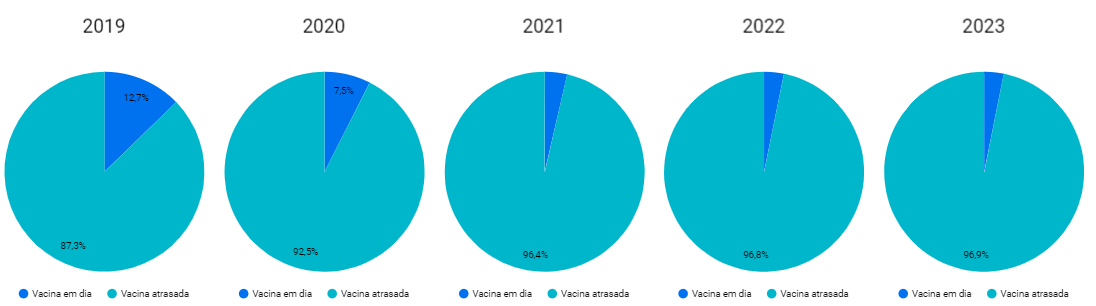

Comentários:

Optei por olhar esses gráficos separados por ano, tendo em vista que os demais anos foram anos atípicos por conta da pandemia.

Em 2019, onde ainda não tínhamos a pandemia de covid-19, considerado como uma ano "normal", reparamos que em 87% dos casos de Óbito, o paciente não possui o esquema de vacinação da gripe em dia.

Mesmo sendo considerados anos atípicos, os gráficos entre 2020 e 2023 vêm mantendo uma alta proporção dos casos de óbito para quem não possui a vacina contra gripe em dia

#### 2.5.2.8. Faixa etária com maior casos de óbito por SRAG

SQL:
```
SELECT  EXTRACT(YEAR FROM DT_NOTIFIC) AS ANO_NOTIFICACAO,
        ROUND(
          AVG(
            CASE TP_IDADE
              WHEN 1 THEN ROUND(NU_IDADE_N/365)
              WHEN 2 THEN ROUND(NU_IDADE_N/12)
              WHEN 3 THEN NU_IDADE_N
            END
          ),
        0) AS AVG_IDADE,
        COUNT(*) AS QTD_OBITOS
FROM `SRAG.notificacao_all`
WHERE EVOLUCAO = 2
GROUP BY 1
ORDER BY 1
```

Gráfico:
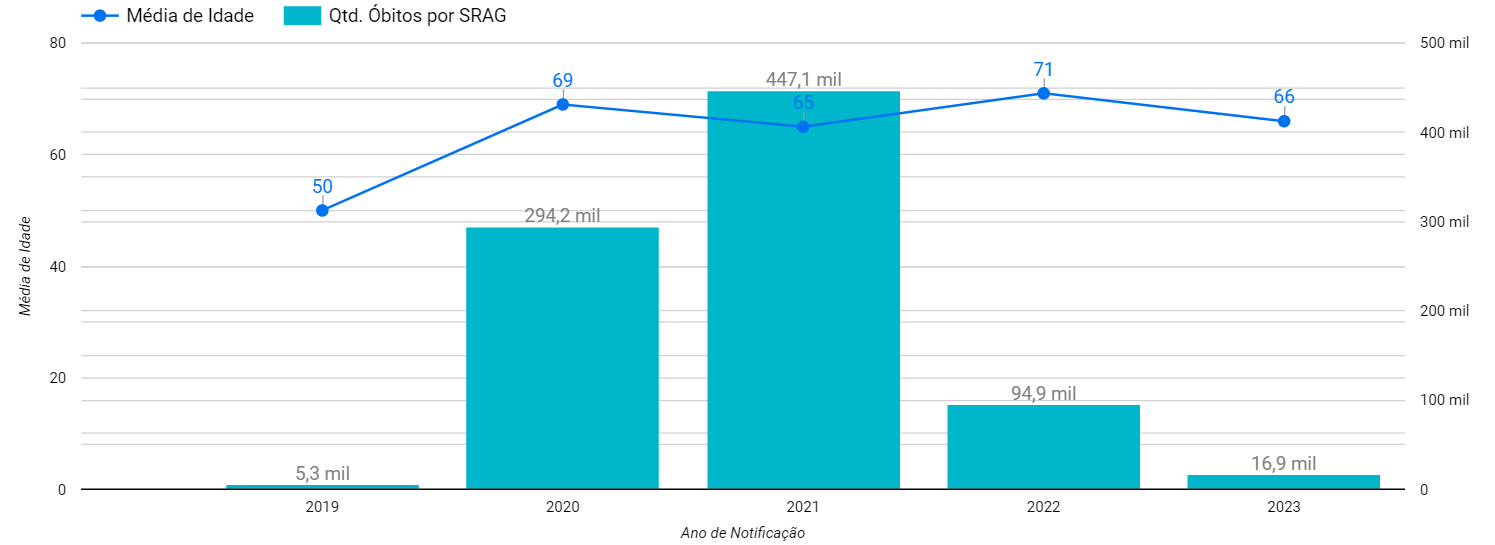

Comentários:

No gráfico acima podemos obervar que em 2019 a média de idade com maior risco de óbito era em pacientes com 50 anos. Nos anos seguintes essa média subiu um pouco ficando entre 65 e 71 anos de idade.



# 3. AUTOAVALIAÇÃO

O trabalho foi realmente desafiador, pois além do tempo curto para o desenvolvimento do trabalho, a maior parte foi gasta com o aprendizado para utilização de uma das plataformas cloud disponíveis.

A plataforma escolhida no meu caso foi a do Google Cloud.

A busca e coleta dos dados foi relativamente fácil, pois optei por usar os datasets que já vinha trabalhando em outros sprints e utilizar os buckets do Google Cloud também foi relativamente fácil.

Na modelagem tentei utilizar o Data Catalog, mas tive dificuldade de entender como funciona, então resolvi fazer em uma planilha Excel para agilizar outras partes do MVP.

A carga dos dados foi a parte mais trabalhosa, pois tive que buscar outras fontes de informações para aprender a utlizar o Data Fusion e ao decorrer do uso entender e solucionar os diversos problemas que iam surgindo. Como a instância do Data Fusion foi a API que teve o maior custo na plataforma, acabaram meus créditos e precisei criar um outro e-mail para a conclusão do trabalho.

Apesar de ter sido trabalhoso, o conhecimento que pude agregar foi fantástico e hoje consigo enxergar que é uma ferramente realmente fácil de se utilizar.

Na análise da qualidade dos dados, eu também não consegui utilizar a ferramenta disponiblizada pelo Google Cloud, devido o tempo que eu tinha para finalizar o trabalho, achei que seria muito mais rápido chegar atributo a atributo através de queries.

Infelizmente não sobrou muito tempo para implementar as diversas análises que eu tinha imaginado e que o dataset escolhido proporcionava, mas consegui atingir os objetivos iniciais.

Como forma de enriquecer o trabalho, futuramente eu adicionaria os datasets referente aos anos anteriores, tendo em vista que a maior parte dos dados trabalhados foram de anos atípicos por conta da Pandemia de covid-19. Outro pondo que eu melhoria também seriam as análises da solução do problema para responder novos perguntas.